# Esteban Marulanda Ardila

In [3]:
#Librerias
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random
import time

In [12]:
SIZE=100 # Tamaño en una dimensión del arreglo de espines a usar SIZE X SIZE
  #Siempre trabajaremos con este tamaño entonces no entra como parametro en laS funciONES
    
Tc = 2/np.log(1 + np.sqrt(2))

def energy(spin,i,j,J,H): #Energía de en la ubicación i,j de la red
    #spin: configuración de espines 
    # i: fila i-esima
    # j: columna j-esima
    # J: Integral de intercambio
    # H: Campo magnetico
    
    
    if J==0:
        
        return -spin[i,j]*H
    
    else: #Energía paramagneto
        N=len(spin)
        return -J*spin[i,j]*(spin[(i+1)%N,j] + spin[i,(j+1)%N] + spin[(i-1)%N,j] + spin[i,(j-1)%N])-spin[i,j]*H
    

def build_system(lista): # Condición inicial
    
    # lista: contiene los posibles valores de espin.
    
    spin=np.empty((SIZE,SIZE))
    for i in range(len(spin)):
        for j in range(len(spin)):
            
            spin[i,j]=random.choice(lista)
    return spin



def build_system2(): # Se construye la condición inicial dando como entrada
    # una lista que contiene los posibles valores de espin.
    
    spin=np.empty((SIZE,SIZE))
    
    for i in range(len(spin)):
        for j in range(len(spin)):
            
            spin[i,j]=np.cos(random.random()*np.pi)# Proyección de la componente uz
            
            
    return spin





def t_energy(spin,J,H): #Calculo de la energía total de una configuración particular (spin) 
    
    
    #spin: configuración de espines a calcular la energia
    #J: Integral de intercambio
    #Campo magnetico
    
    etotal=0
    
    for i in range(len(spin)):
        
        for j in range(len(spin)):
            
            etotal+=energy(spin,i,j,J,H)
    return etotal/4
    


def main(spin,H,J,T,steps,condition='ISING'): #Metopolis y montecarlo
    # recibe la configuraciones de espines actual, campo magnetico, integral de intercambio,
    #temperatura, número de pasos de Montecarlo y sí el modelo es ISING o Heisenberg.
    
    if condition=='ISING':
        
        
        for k in range(steps):
        

            j=np.random.randint(0,SIZE)
        
            i=np.random.randint(0,SIZE)
        
            Delta_E=-2.*energy(spin,i,j,J,H)
        
            #Esta parte se debe modifical en caso de querer hacer el codigo para 3/2
            if Delta_E <= 0.:
                 spin[i,j]*=-1
            elif np.exp(-1./T*Delta_E) >= np.random.rand():
                spin[i,j]*=-1
            
        return spin
    

    
    elif condition=='HEISENBERG':
        
        HH=[-3/2,-1/2,1/2,3/2]

        for k in range(10*steps):
        

            j=np.random.randint(0,SIZE)
        
            i=np.random.randint(0,SIZE)
            
            Delta_E=[]
            
            
            
            
                
            spinp=np.copy(spin)
            
            # Se selecciona un valor de spin aleatorio y se hace metropolis
        
            spinp[i,j]=random.choice(HH)
        
            Delta_E=energy(spinp,i,j,J,H)-energy(spin,i,j,J,H)
            
            
            if Delta_E <= 0.:
                spin[i,j]=spinp[i,j]
                
            elif np.exp(-1./T*Delta_E) >= random.random():
                spin[i,j]=spinp[i,j]
                
    else:  # HEISENBERG CLASICO.
        
        
        for k in range(steps):
        

            j=np.random.randint(0,SIZE)
        
            i=np.random.randint(0,SIZE)
            
            Delta_E=[]
            
                
            spinp=np.copy(spin)
            
            spinp[i,j]=np.cos(random.random()*np.pi)
        
            Delta_E=energy(spinp,i,j,J,H)-energy(spin,i,j,J,H)
            
            
            
            #Esta parte se debe modificar en caso de querer hacer el codigo para 3/2
            
            if Delta_E <= 0.:
                spin[i,j]=spinp[i,j]
                
                
            elif np.exp(-1./T*Delta_E) >= np.random.rand():
                spin[i,j]=spinp[i,j]
               
        
               
        return spin
    
        
#Para el Ferromagneto ISING        

def energ_magc(config, T, H, pasos, eqSteps, err_runs):
        
    # Función que calcula la energia interna, magnetización y capacidad calorifica para un ferromagneto tipo ISING 
    # Se reciben como parametros de entrada:
    # config: red de espin
    # T, H: Temperatura y campo magnetico en un arreglo de dimensiones iguales
    # pasos: cantidad de pasos a utilizar para el calculo de promedios
    # eqSteps: Pasos para llevar el sistema al equilibrio
    # err_runs: número de pasos que se utilizan para promediar cierta configuración dado un T y un H
    
    
    E,M,C= np.zeros(len(T)), np.zeros(len(T)), np.zeros(len(T))
    
    Energies = []
    Magnetizations = []
    SpecificHeats = []
   
    
    for t in range(0,len(T)):
        # initialize total energy and mag
       
        # evolve the system to equilibrium
        for i in range(eqSteps):
             zz=main(config,H[t],J,T[t],SIZE*SIZE,condition='ISING')
        
        # list of ten macroscopic properties
        Ez = []
        Cz = []
        Mz = []
       

        for j in range(err_runs):
            E = E_squared = M = M_squared = 0
            for i in range(pasos):
                zz=main(zz,H[t],J,T[t],SIZE*SIZE,condition='ISING')         
                energy = t_energy(zz,J,H[t]) # calculate the energy at time stamp
                mag = np.sum(zz) # calculate the abs total mag. at time stamp

                # sum up total energy and mag after each time steps

                E += energy
                E_squared += energy**2
                M += mag
                


            # mean (divide by total time steps)

            E_mean = E/pasos
            E_squared_mean = E_squared/pasos
            M_mean = M/pasos
            

            # calculate macroscopic properties (divide by # sites) and append
            beta=1./T[t]
            Energy = E_mean/(SIZE**2)
            SpecificHeat = beta**2*(E_squared_mean - E_mean**2)/(SIZE)**2
            Magnetization = M_mean/SIZE**2
            

            Ez.append(Energy)
            Cz.append(SpecificHeat)
            Mz.append(Magnetization)

        Energy = np.mean(Ez)
        Energies.append(Energy)
       
        Magnetization = np.mean(Mz)
        Magnetizations.append(Magnetization)
       

        
        SpecificHeat = np.mean(Cz)
        SpecificHeats.append(SpecificHeat)
      

        
    return (zz,Energies,Magnetizations,SpecificHeats)



def mag(spin,stepss,T,H,J,modelo='ISING'): #Calcula propiedades que dependen de la temperatura
    #Recibe configuración actual de espin, pasos para realizar promedio, cantidad de valores de 
    #temperatura
    
    n=1.0/(stepss*SIZE*SIZE)
    Mag=[]
    
            
    Mc=np.copy(spin)        
    for t in range(0,len(H)):
        E=0
        M=0
        E_squared=0 
        
        main(spin, H[t], J, T[t],len(spin)*len(spin),modelo)
        
        M += np.sum(spin)
        
        for i in range(stepss):
            
            main(spin, H[t], J , T[t],len(spin),modelo)
            
            M += np.sum(spin)
            
        Mag.append(M*n)
        
        
    return  Mag 


def ajuste_ising(H,mu):
    
    
    #Ajuste magnetización  Paramagneto tipo ISING 1/2 con temperatura fija
    
    #H: Campo magnetico
    
    #mu: Spin
    
    return mu*np.tanh(mu*H/(T))


def ajuste_ising1(T,mu):
    
    
    #Ajuste magnetización  Paramagneto tipo ISING 1/2 con campo magnetico fijo
    
    #T: Temperatura
    
    #mu: Spin
    
    return mu*np.tanh(mu*H/(T))


def ajuste_heisenberg(H,muu):
    
    #Ajuste magnetización Paramagneto tipo Heisenberg cuántico 3/2 con temperatura fija
    
    #H: Campo magnetico
    
    #muu: Spin
    
    eta=H/T
    
    Bj=(muu+1/2)*1/np.tanh((muu+1/2)*eta)-1/(2*np.tanh(eta/2))
    
    return muu*Bj

def ajuste_clasico(H,muu):
    
    eta=muu*H/T
    
    Lj=1/np.tanh(eta)-1/(eta)
    
    return muu*Lj

def ajuste_capacidad(T,J):
    
    
    #Ajuste capacidad calorifica Ferromagneto tipo ISING 1/2 con campo magnetico fijo
    
    #T: Temperatura
    
    #J: Spin
    
    
    HC=[]
    for i in range(len(T)):
            
        if T[i]<= Tc:
            HC.append(2/np.pi*(2*J/Tc)**2*(np.log(Tc/(2*J))-np.log(1-T[i]/Tc)-(1+np.pi/4)))
        else:
            HC.append(0)
    return HC

def ajuste_ferro(T,J):
    
    
    #Ajuste magnetización Ferromagneto tipo ISING 1/2 con campo magnetico fijo
    
    #T: Temperatura
    
    #J: Spin
    
    
    MC=[]
    for i in range(len(T)):
            
        if T[i]<= Tc:
            MC.append((1-(np.sinh(2*J/T[i]))**(-4))**(1/8))
        else:
            MC.append(0)
    
    return MC

In [5]:
abs(2.25-Tc)/Tc*100

0.8454714603014134

In [12]:
font = {'weight' : 'bold', 'size'   : 25}
matplotlib.rc('font', **font)

# Paramagneto tipo ISING S=1/2



# M vs H

In [67]:
pasos=256
spin=build_system([1/2,-1/2])
Tk=[0.1,1,20]
H=np.linspace(-10,10,32)
J=0
start_time = time.time()
mm1= mag(spin,pasos,np.ones(len(H))*Tk[0],H,J)
mm2= mag(spin,pasos,np.ones(len(H))*Tk[1],H,J)
mm3= mag(spin,pasos,np.ones(len(H))*Tk[2],H,J)
H=np.delete(H,0)
mm1=np.delete(mm1,0)
mm2=np.delete(mm2,0)
mm3=np.delete(mm3,0)
print ("My program took", time.time() - start_time, "to run")



My program took 35.118696451187134 to run


In [22]:
256*100

25600

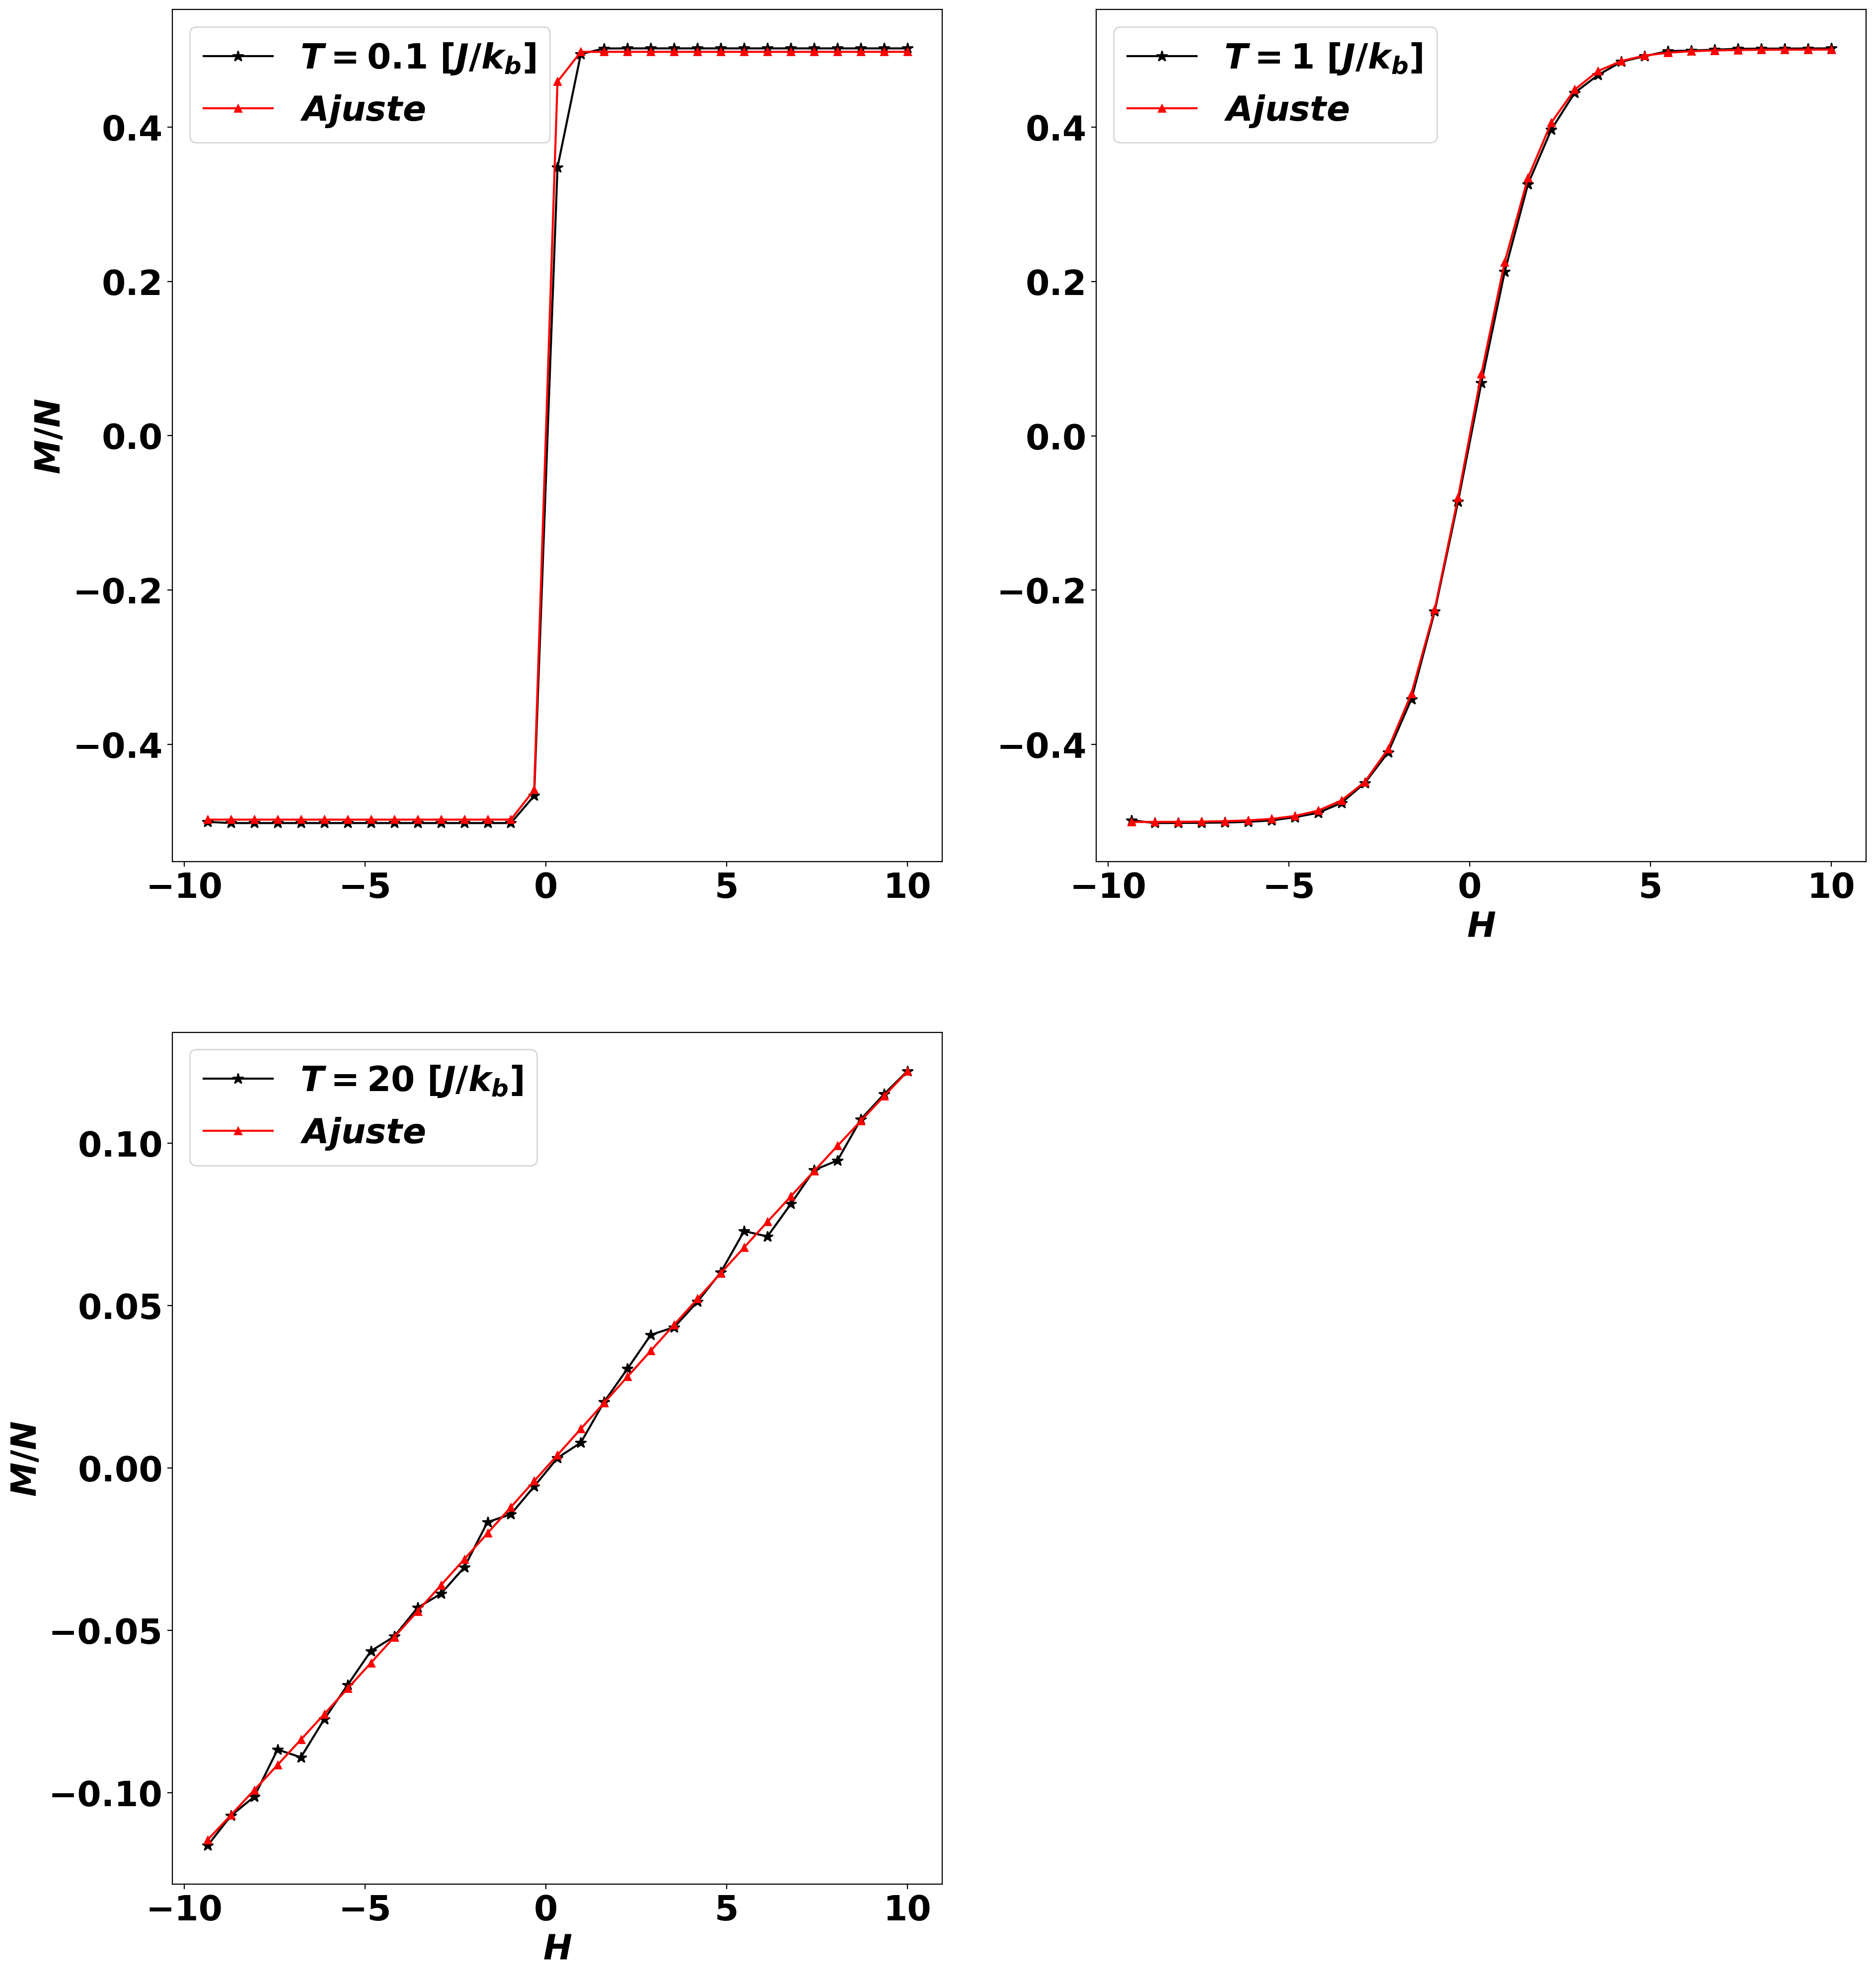

In [80]:
f = plt.figure(figsize=(22 , 25),dpi=200)

for i in range(1,4):
   
    T=Tk[i-1]
    mej_val, cov = curve_fit(ajuste_ising, H, eval('mm'+str(i))) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    # De acuerdo a la definición de 'model', mej_val[0] es la desviación estandar y mej_val[1] la media.
    #Graficos
    fig1 = plt.figure(1)
    ax1 = plt.subplot(2,2,i)
    ax1.plot(H,eval('mm'+str(i)),ms=8,color='black',marker="*",label='$T=$'+'$'+str(T)+'$'+' '+'$[J/k_{b}]$')
    ax1.plot(H,ajuste_ising(H,mej_val[0]),ms=5,color='red',marker="^",label='$Ajuste$')
    if i==1 or i==3:
        plt.ylabel('$M/N$',fontsize=25)
    if i==2 or i==3:
        plt.xlabel('$H$',fontsize=25)
        
    
    plt.legend()

    

f.savefig('PI_MH.png')    

plt.show()
    


# M vs H/T

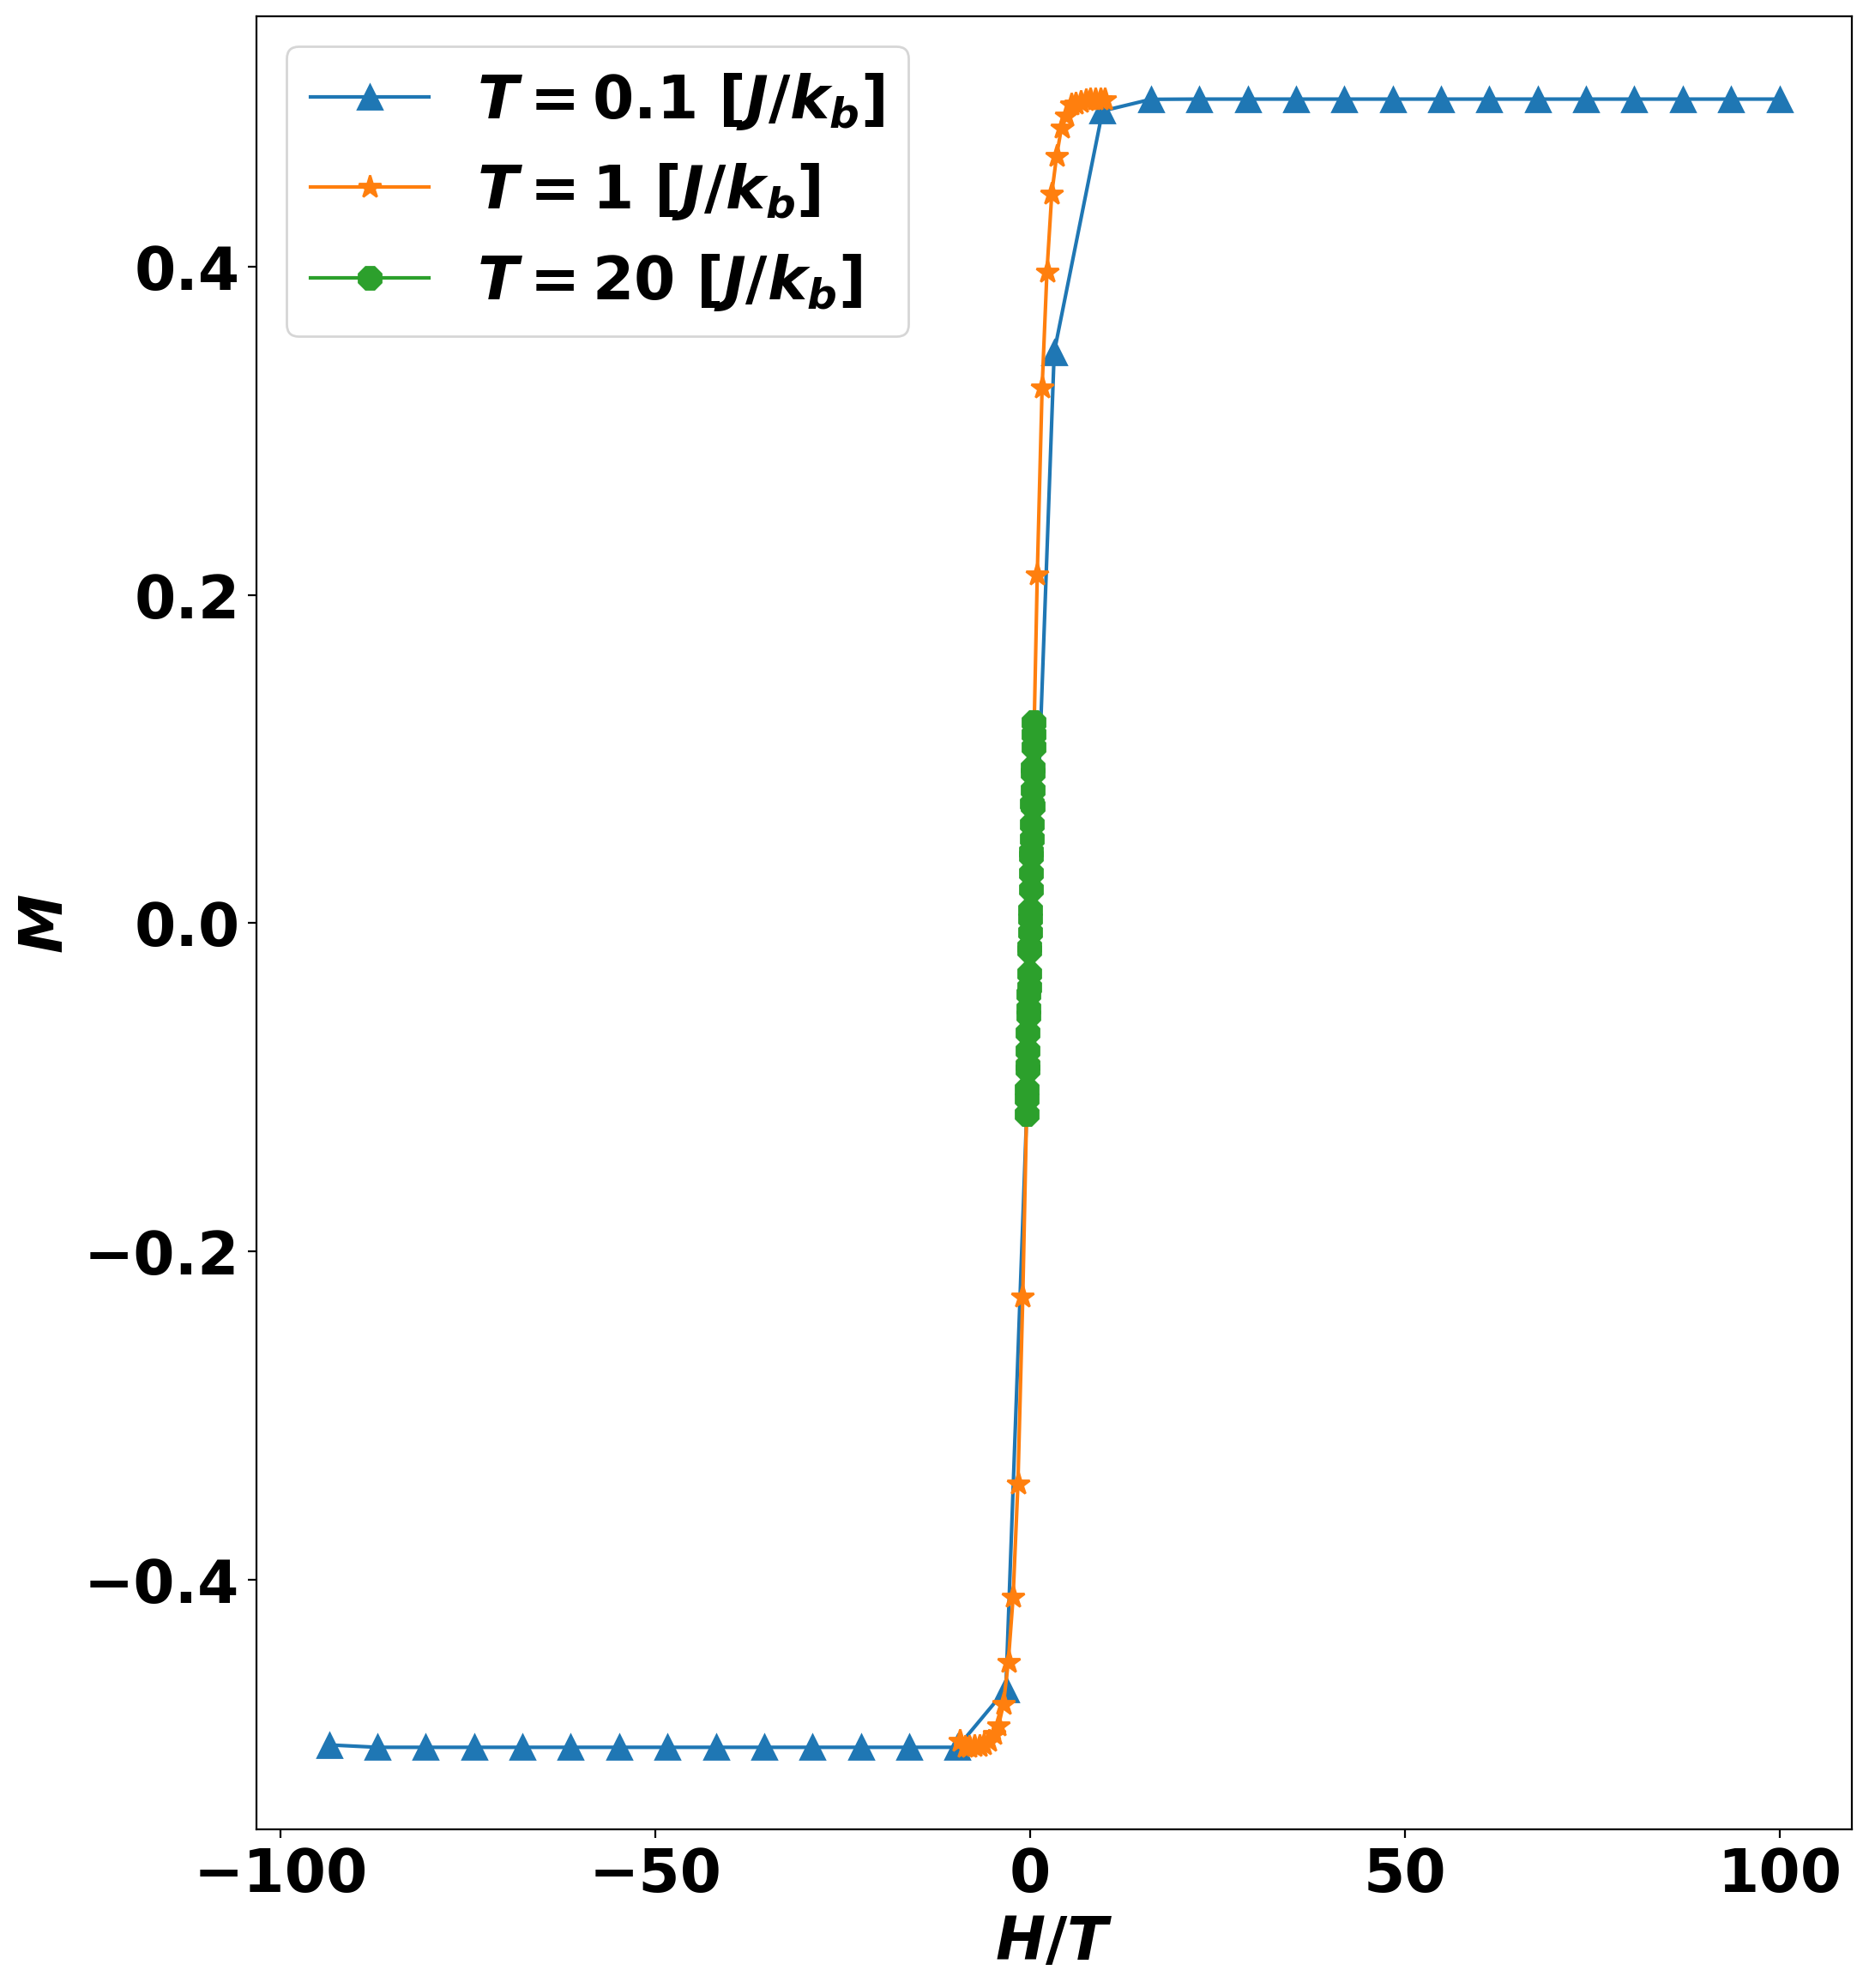

In [76]:
f = plt.figure(figsize=(12, 14),dpi=200)
mark=["^","*","8"]

for i in range(1,4):
    
    plt.plot(H/Tk[i-1],eval('mm'+str(i)),ms=10,marker=mark[i-1],label='$T=$'+'$'+str(Tk[i-1])+'$'+' '+'$[J/k_{b}]$')
    #ax1.plot(H,ajuste_ising(H,mej_val[0]),ms=5,marker="^",label='Ajuste')
    if i==1 or i==3:
        plt.ylabel('$M$')
    if i==2 or i==3:
        plt.xlabel('$H/T$')
        
    
    plt.legend()

    
f.savefig('PI_MHT.jpg')   

plt.show()
    





# Paramagneto tipo Heisenberg clásico S=$\infty$



# M vs H

In [98]:
pasos=516
spin=build_system2()
Tk=[0.1,1,20]
H=np.linspace(-10,10,32)
J=0
start_time = time.time()
mm1= mag(spin,pasos,np.ones(len(H))*Tk[0],H,J,'c')
mm2= mag(spin,pasos,np.ones(len(H))*Tk[1],H,J,'c')
mm3= mag(spin,pasos,np.ones(len(H))*Tk[2],H,J,'c')

H=np.delete(H,0)
mm1=np.delete(mm1,0)
mm2=np.delete(mm2,0)
mm3=np.delete(mm3,0)
print ("My program took", time.time() - start_time, "to run")



My program took 139.22419714927673 to run


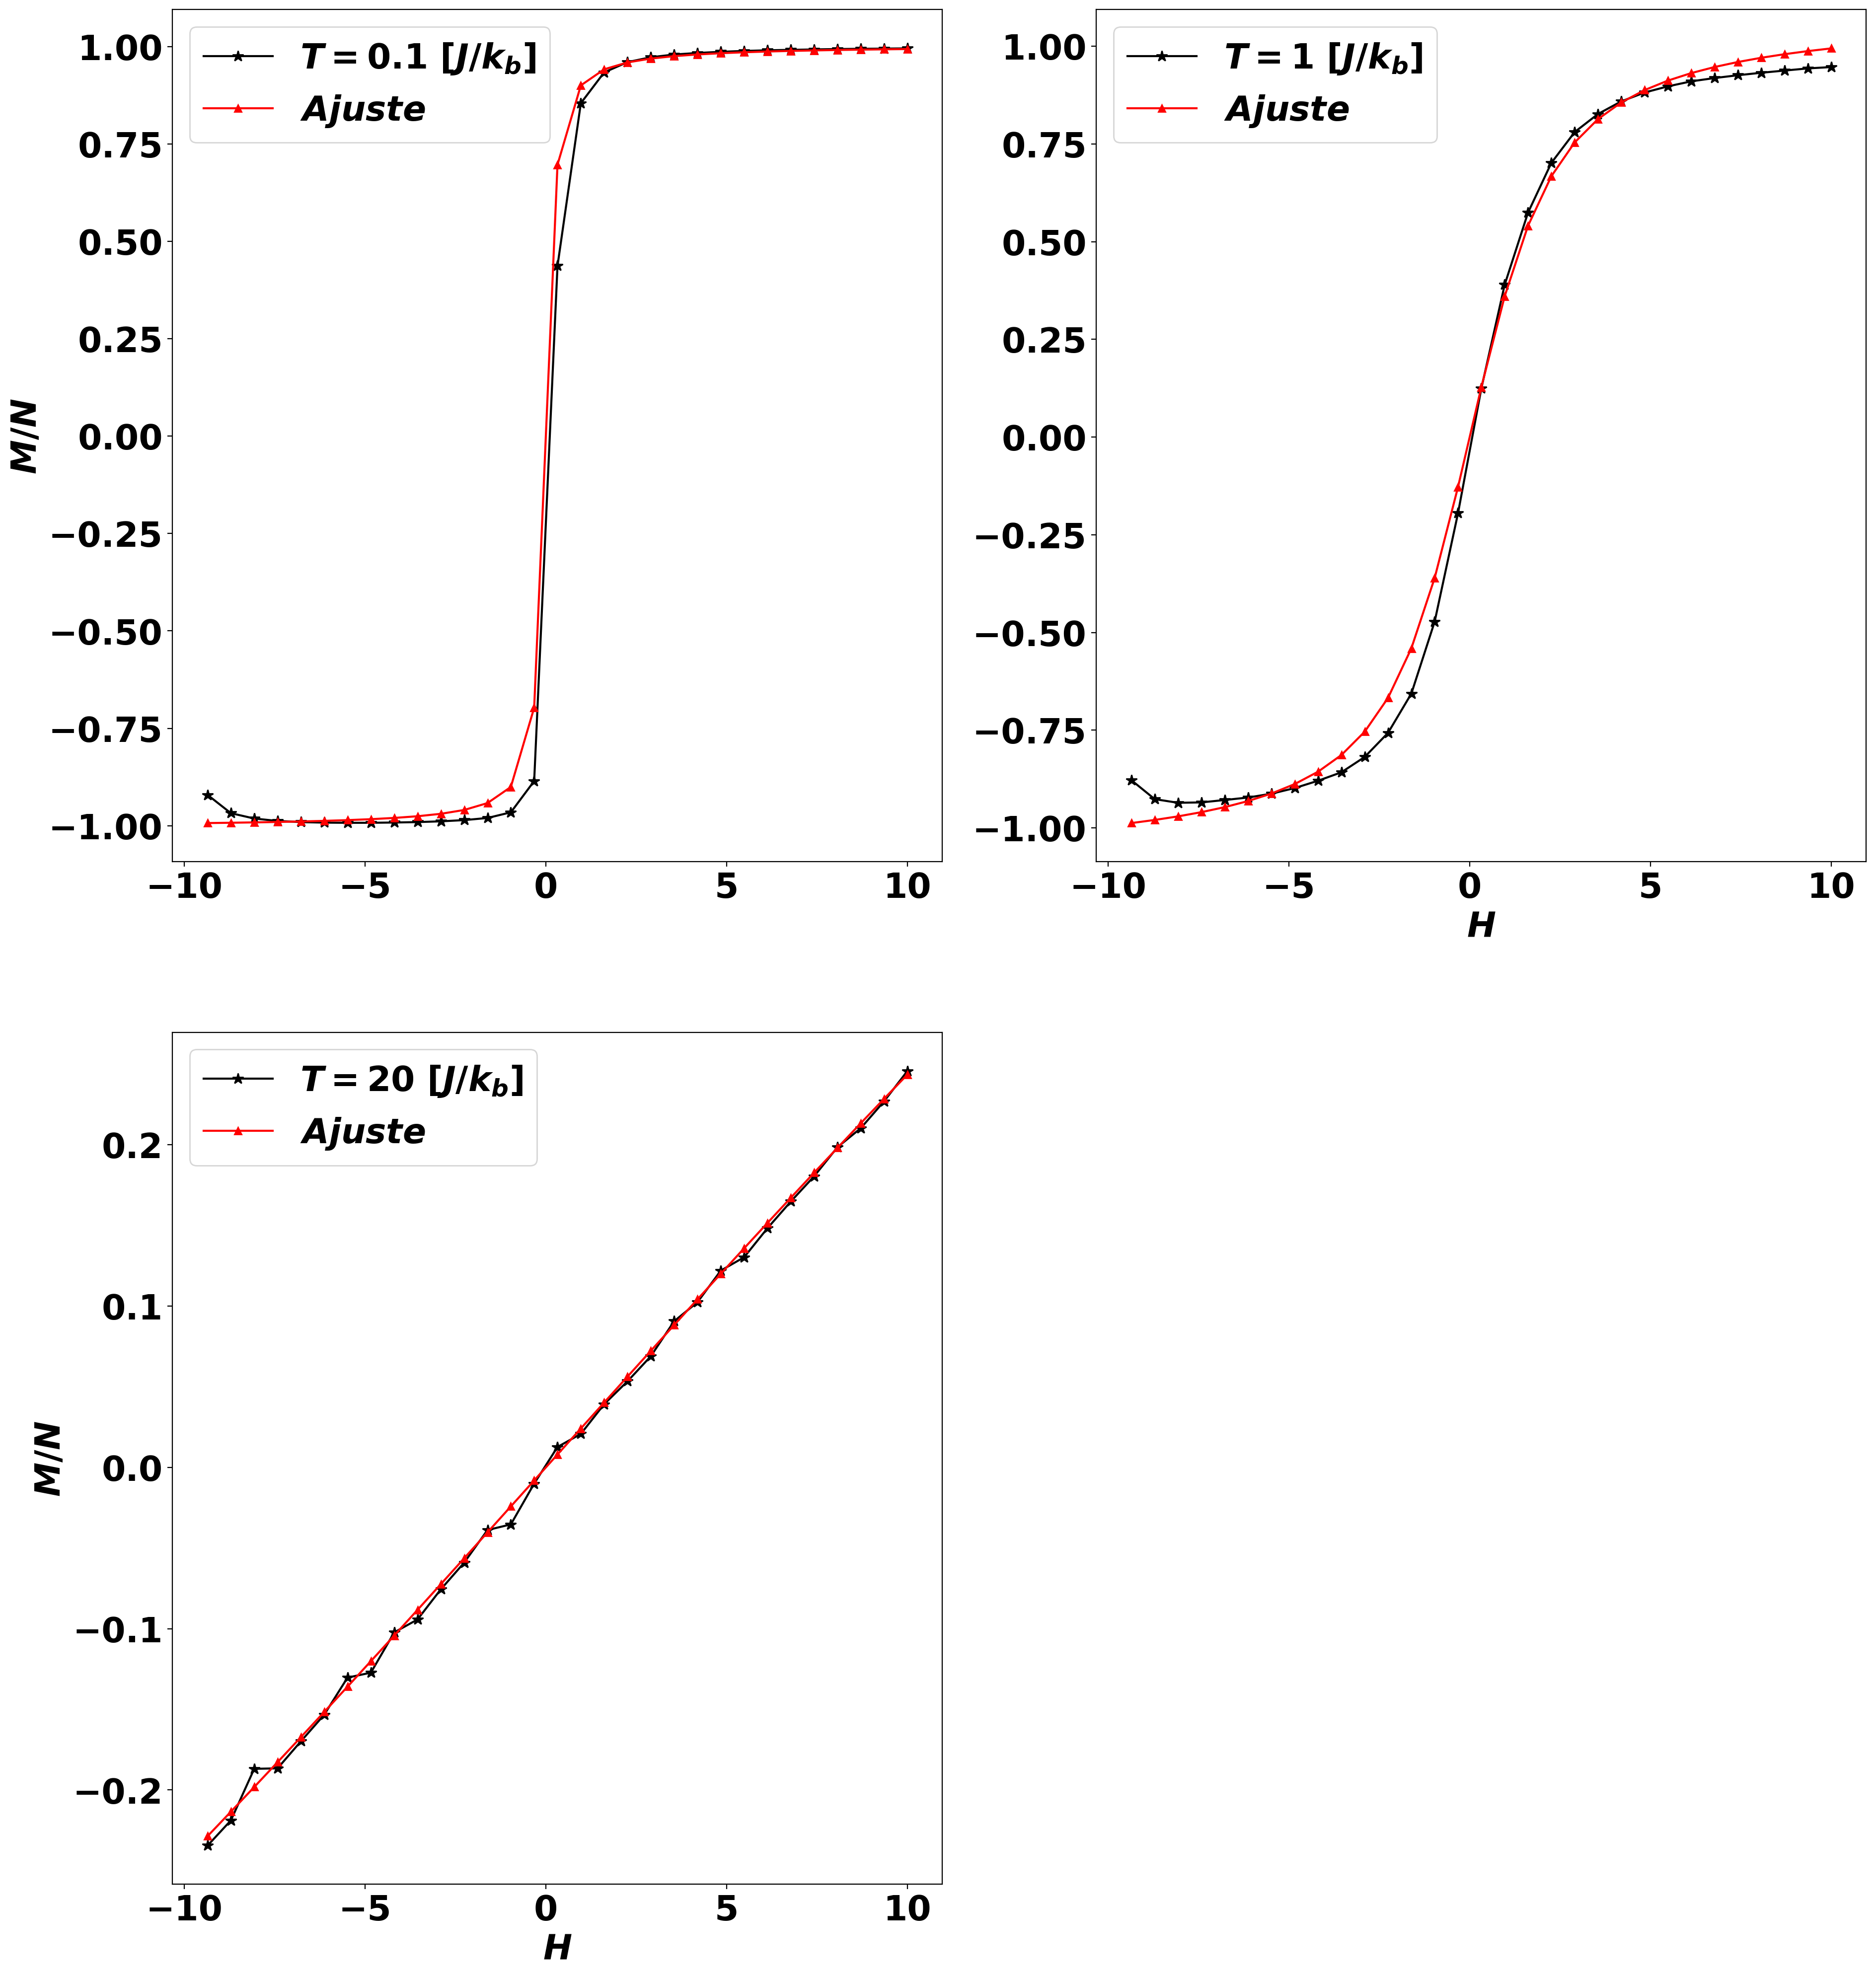

In [101]:
f = plt.figure(figsize=(22 , 25),dpi=200)
for i in range(1,4):
   
    T=Tk[i-1]
    mej_val, cov = curve_fit(ajuste_clasico, H, eval('mm'+str(i))) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    # De acuerdo a la definición de 'model', mej_val[0] es la desviación estandar y mej_val[1] la media.
    #Graficos
    fig1 = plt.figure(1)
    ax1 = plt.subplot(2,2,i)
    ax1.plot(H,eval('mm'+str(i)),ms=8,color='black',marker="*",label='$T=$'+'$'+str(T)+'$'+' '+'$[J/k_{b}]$')
    ax1.plot(H,ajuste_clasico(H,mej_val[0]),ms=5,color='red',marker="^",label='$Ajuste$')
    if i==1 or i==3:
        plt.ylabel('$M/N$',fontsize=25)
    if i==2 or i==3:
        plt.xlabel('$H$',fontsize=25)
        
    
    plt.legend(fontsize=25)

    

f.savefig('PHC_MH.png')    

plt.show()
    


# M vs H/T

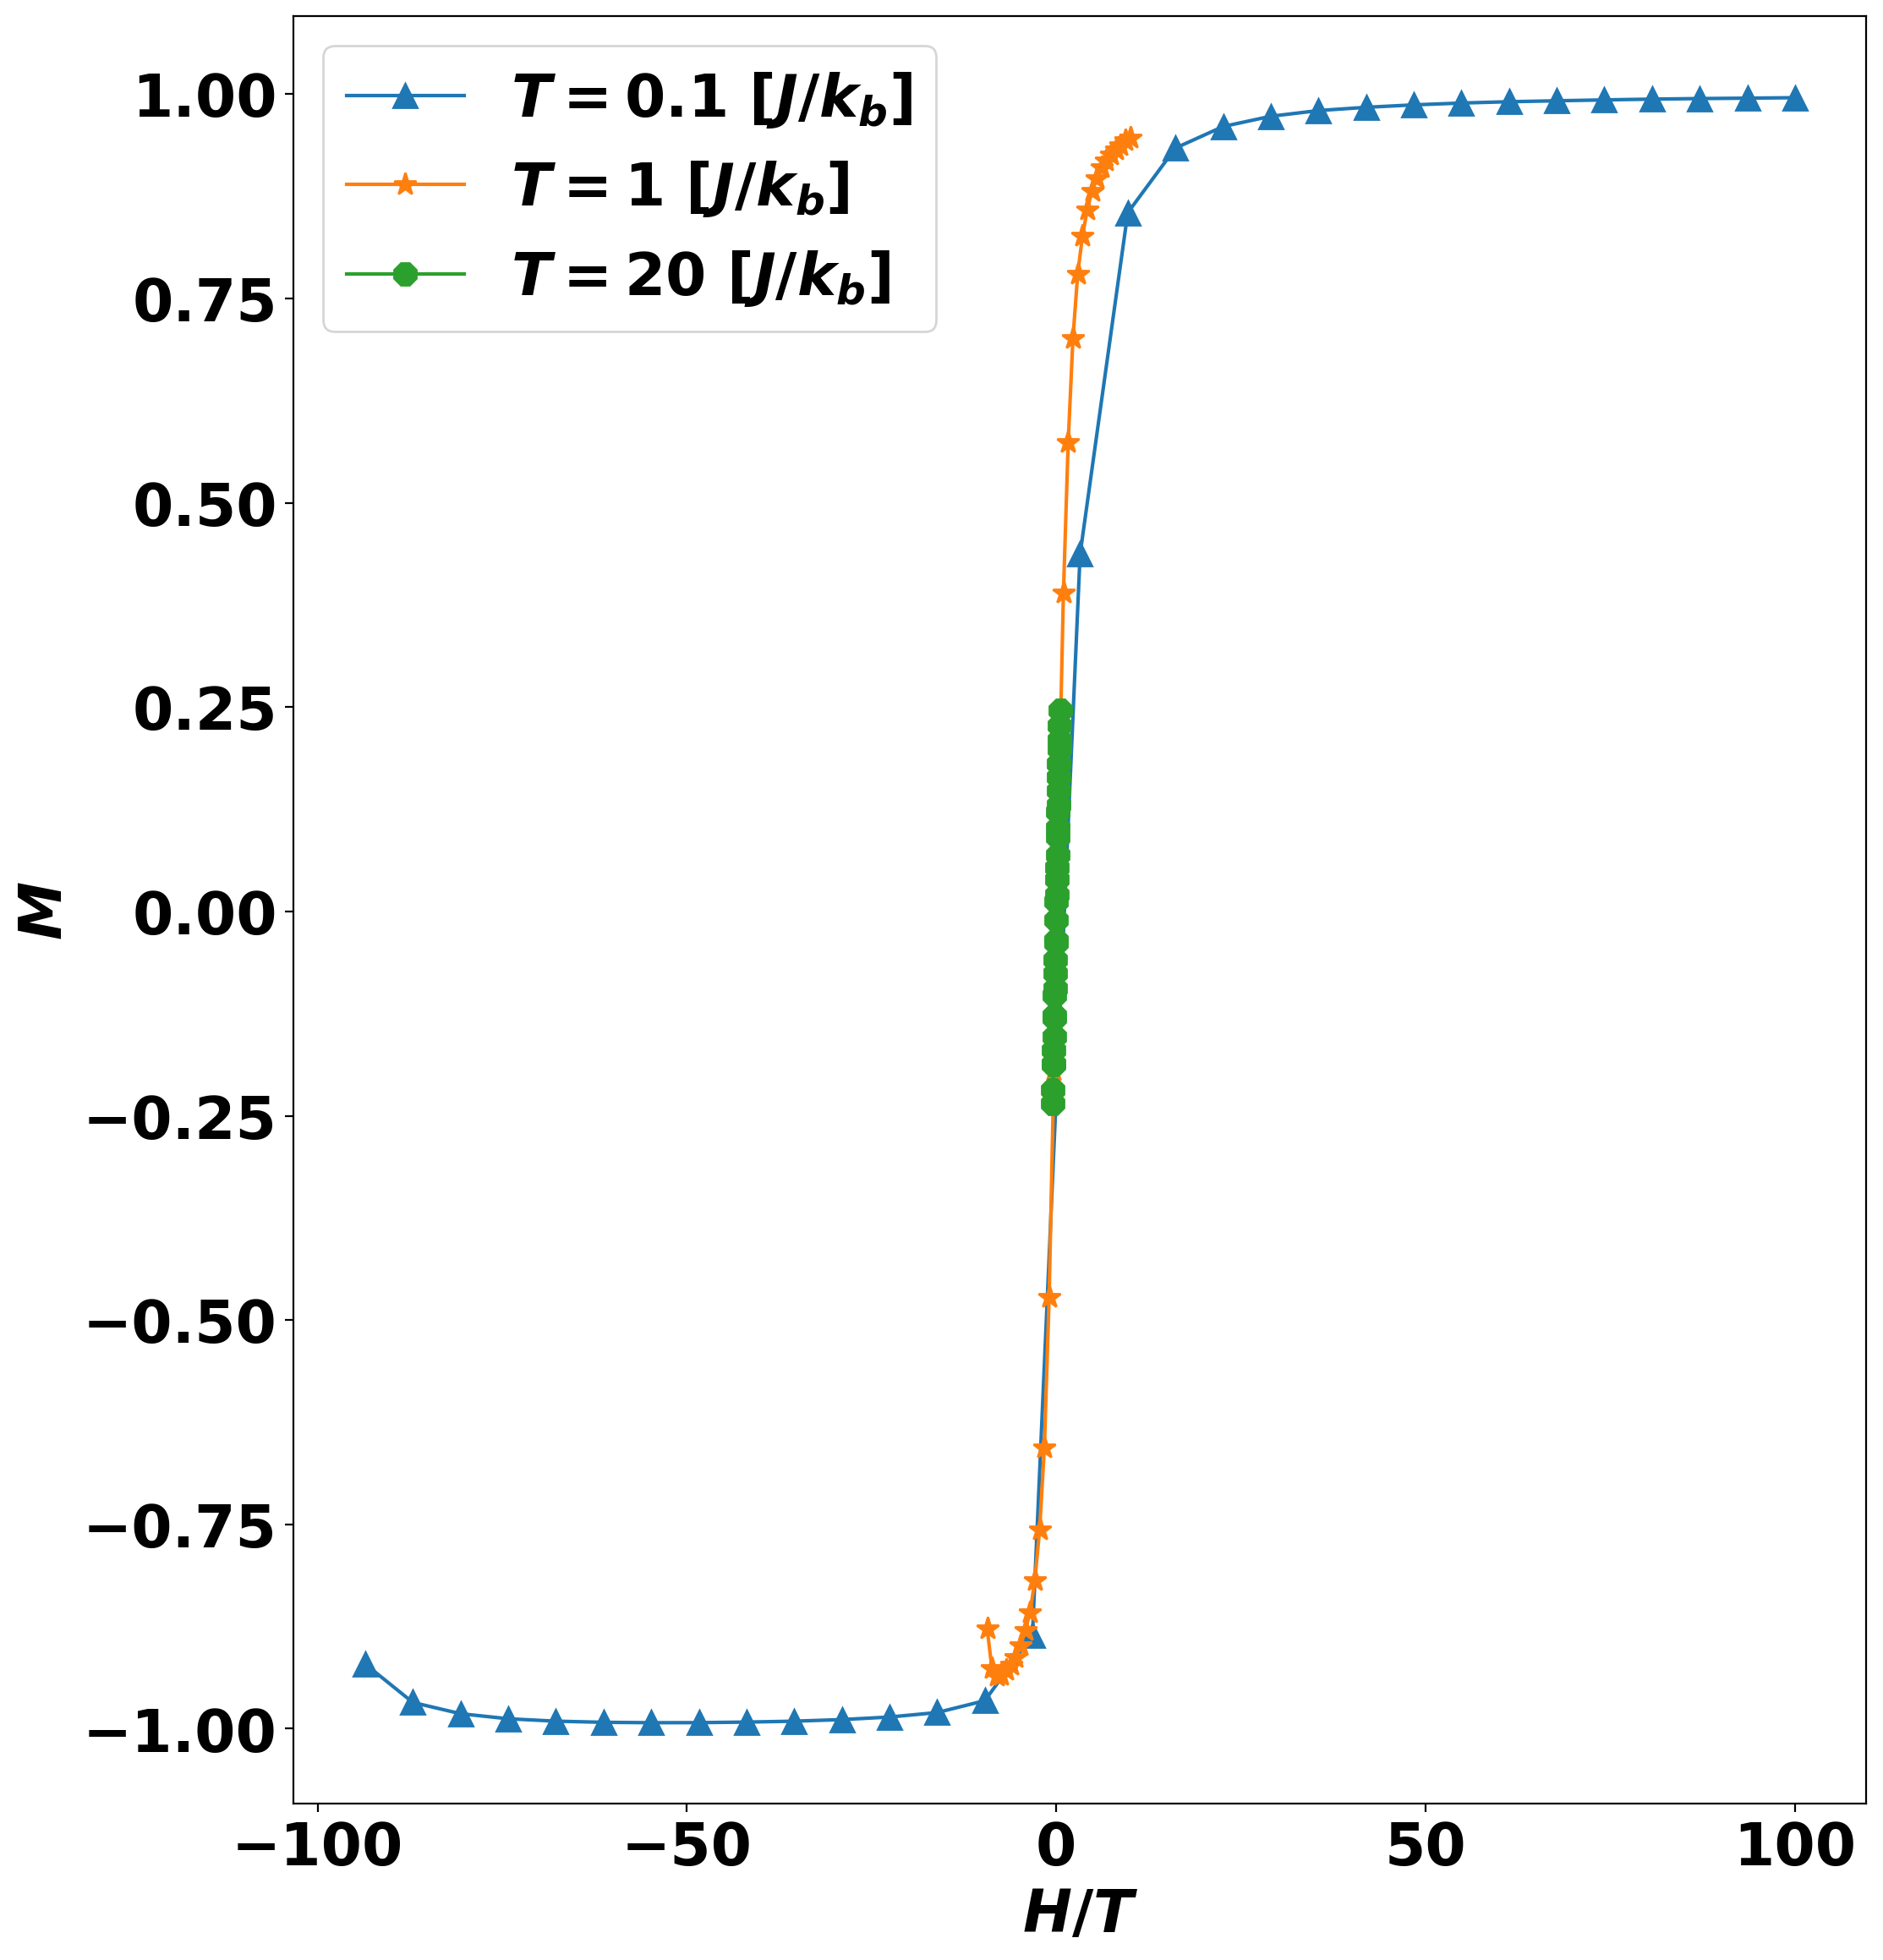

In [102]:
f = plt.figure(figsize=(12, 14),dpi=200)
mark=["^","*","8"]

for i in range(1,4):
    
    plt.plot(H/Tk[i-1],eval('mm'+str(i)),ms=10,marker=mark[i-1],label='$T=$'+'$'+str(Tk[i-1])+'$'+' '+'$[J/k_{b}]$')
    #ax1.plot(H,ajuste_ising(H,mej_val[0]),ms=5,marker="^",label='Ajuste')
    if i==1 or i==3:
        plt.ylabel('$M$')
    if i==2 or i==3:
        plt.xlabel('$H/T$')
        
    
    plt.legend()

    
f.savefig('PHC_MHT.jpg')   

plt.show()
    





# Paramagneto tipo Heisenberg cuántico S=3/2



# M vs H

In [103]:
pasos=256
spin=build_system([-3/2,-1/2,1/2,3/2])
Tk=[0.1,1,20]
H=np.linspace(-10,10,32)
J=0
start_time = time.time()
mm1= mag(spin,pasos,np.ones(len(H))*Tk[0],H,J,'HEISENBERG')
mm2= mag(spin,pasos,np.ones(len(H))*Tk[1],H,J,'HEISENBERG')
mm3= mag(spin,pasos,np.ones(len(H))*Tk[2],H,J,'HEISENBERG')

print ("My program took", time.time() - start_time, "to run")

H=np.delete(H,0)
mm1=np.delete(mm1,0)
mm2=np.delete(mm2,0)
mm3=np.delete(mm3,0)

My program took 715.4629609584808 to run


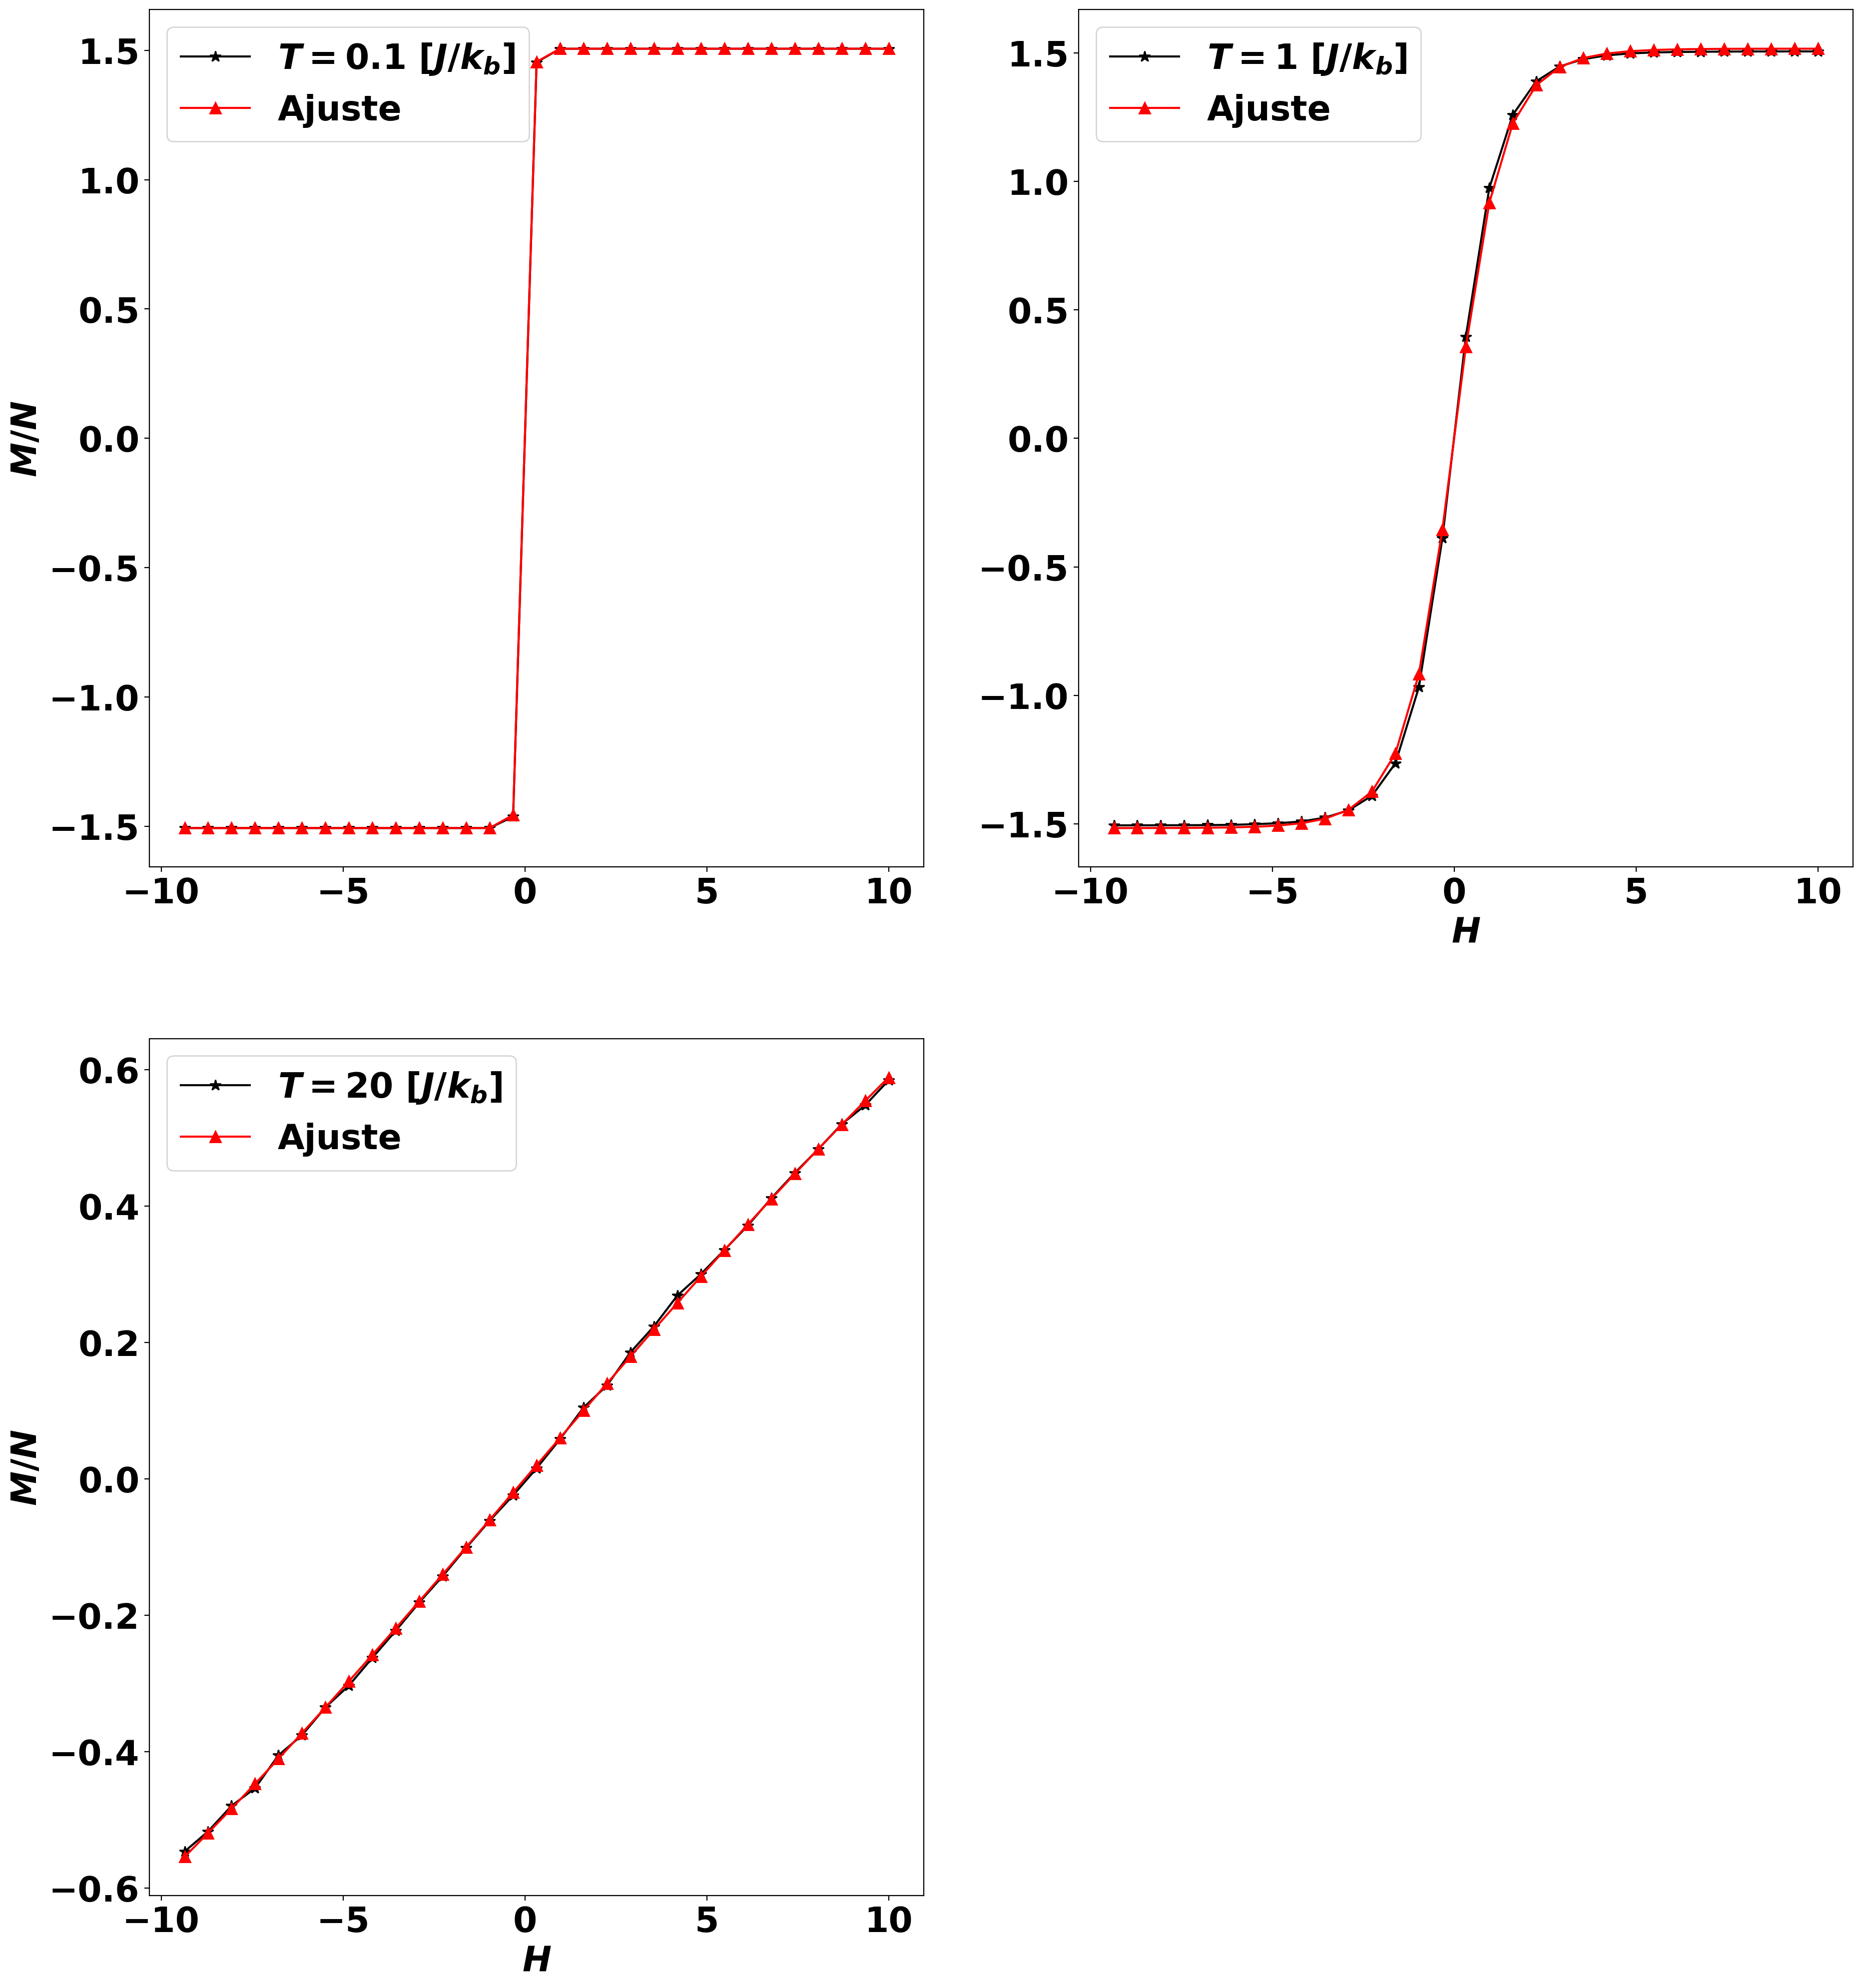

In [107]:
f = plt.figure(figsize=(22 , 25),dpi=200)

for i in range(1,4):
   
    T=Tk[i-1]
    mej_val, cov = curve_fit(ajuste_heisenberg, H, eval('mm'+str(i))) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    # De acuerdo a la definición de 'model', mej_val[0] es la desviación estandar y mej_val[1] la media.
    #Graficos
    fig1 = plt.figure(1)
    ax1 = plt.subplot(2,2,i)
    ax1.plot(H,eval('mm'+str(i)),ms=8,color='black',marker="*",label='$T=$'+'$'+str(T)+'$'+' '+'$[J/k_{b}]$')
    ax1.plot(H,ajuste_heisenberg(H,mej_val[0]),ms=8,color='red',marker="^",label='Ajuste')
    if i==1 or i==3:
        plt.ylabel('$M/N$',fontsize=25)
    if i==2 or i==3:
        plt.xlabel('$H$',fontsize=25)
        
    
    plt.legend(fontsize=25)

        
    
    plt.legend()
    
    
f.savefig('PH_MH.png')   


plt.show()
    


# M vs H/T

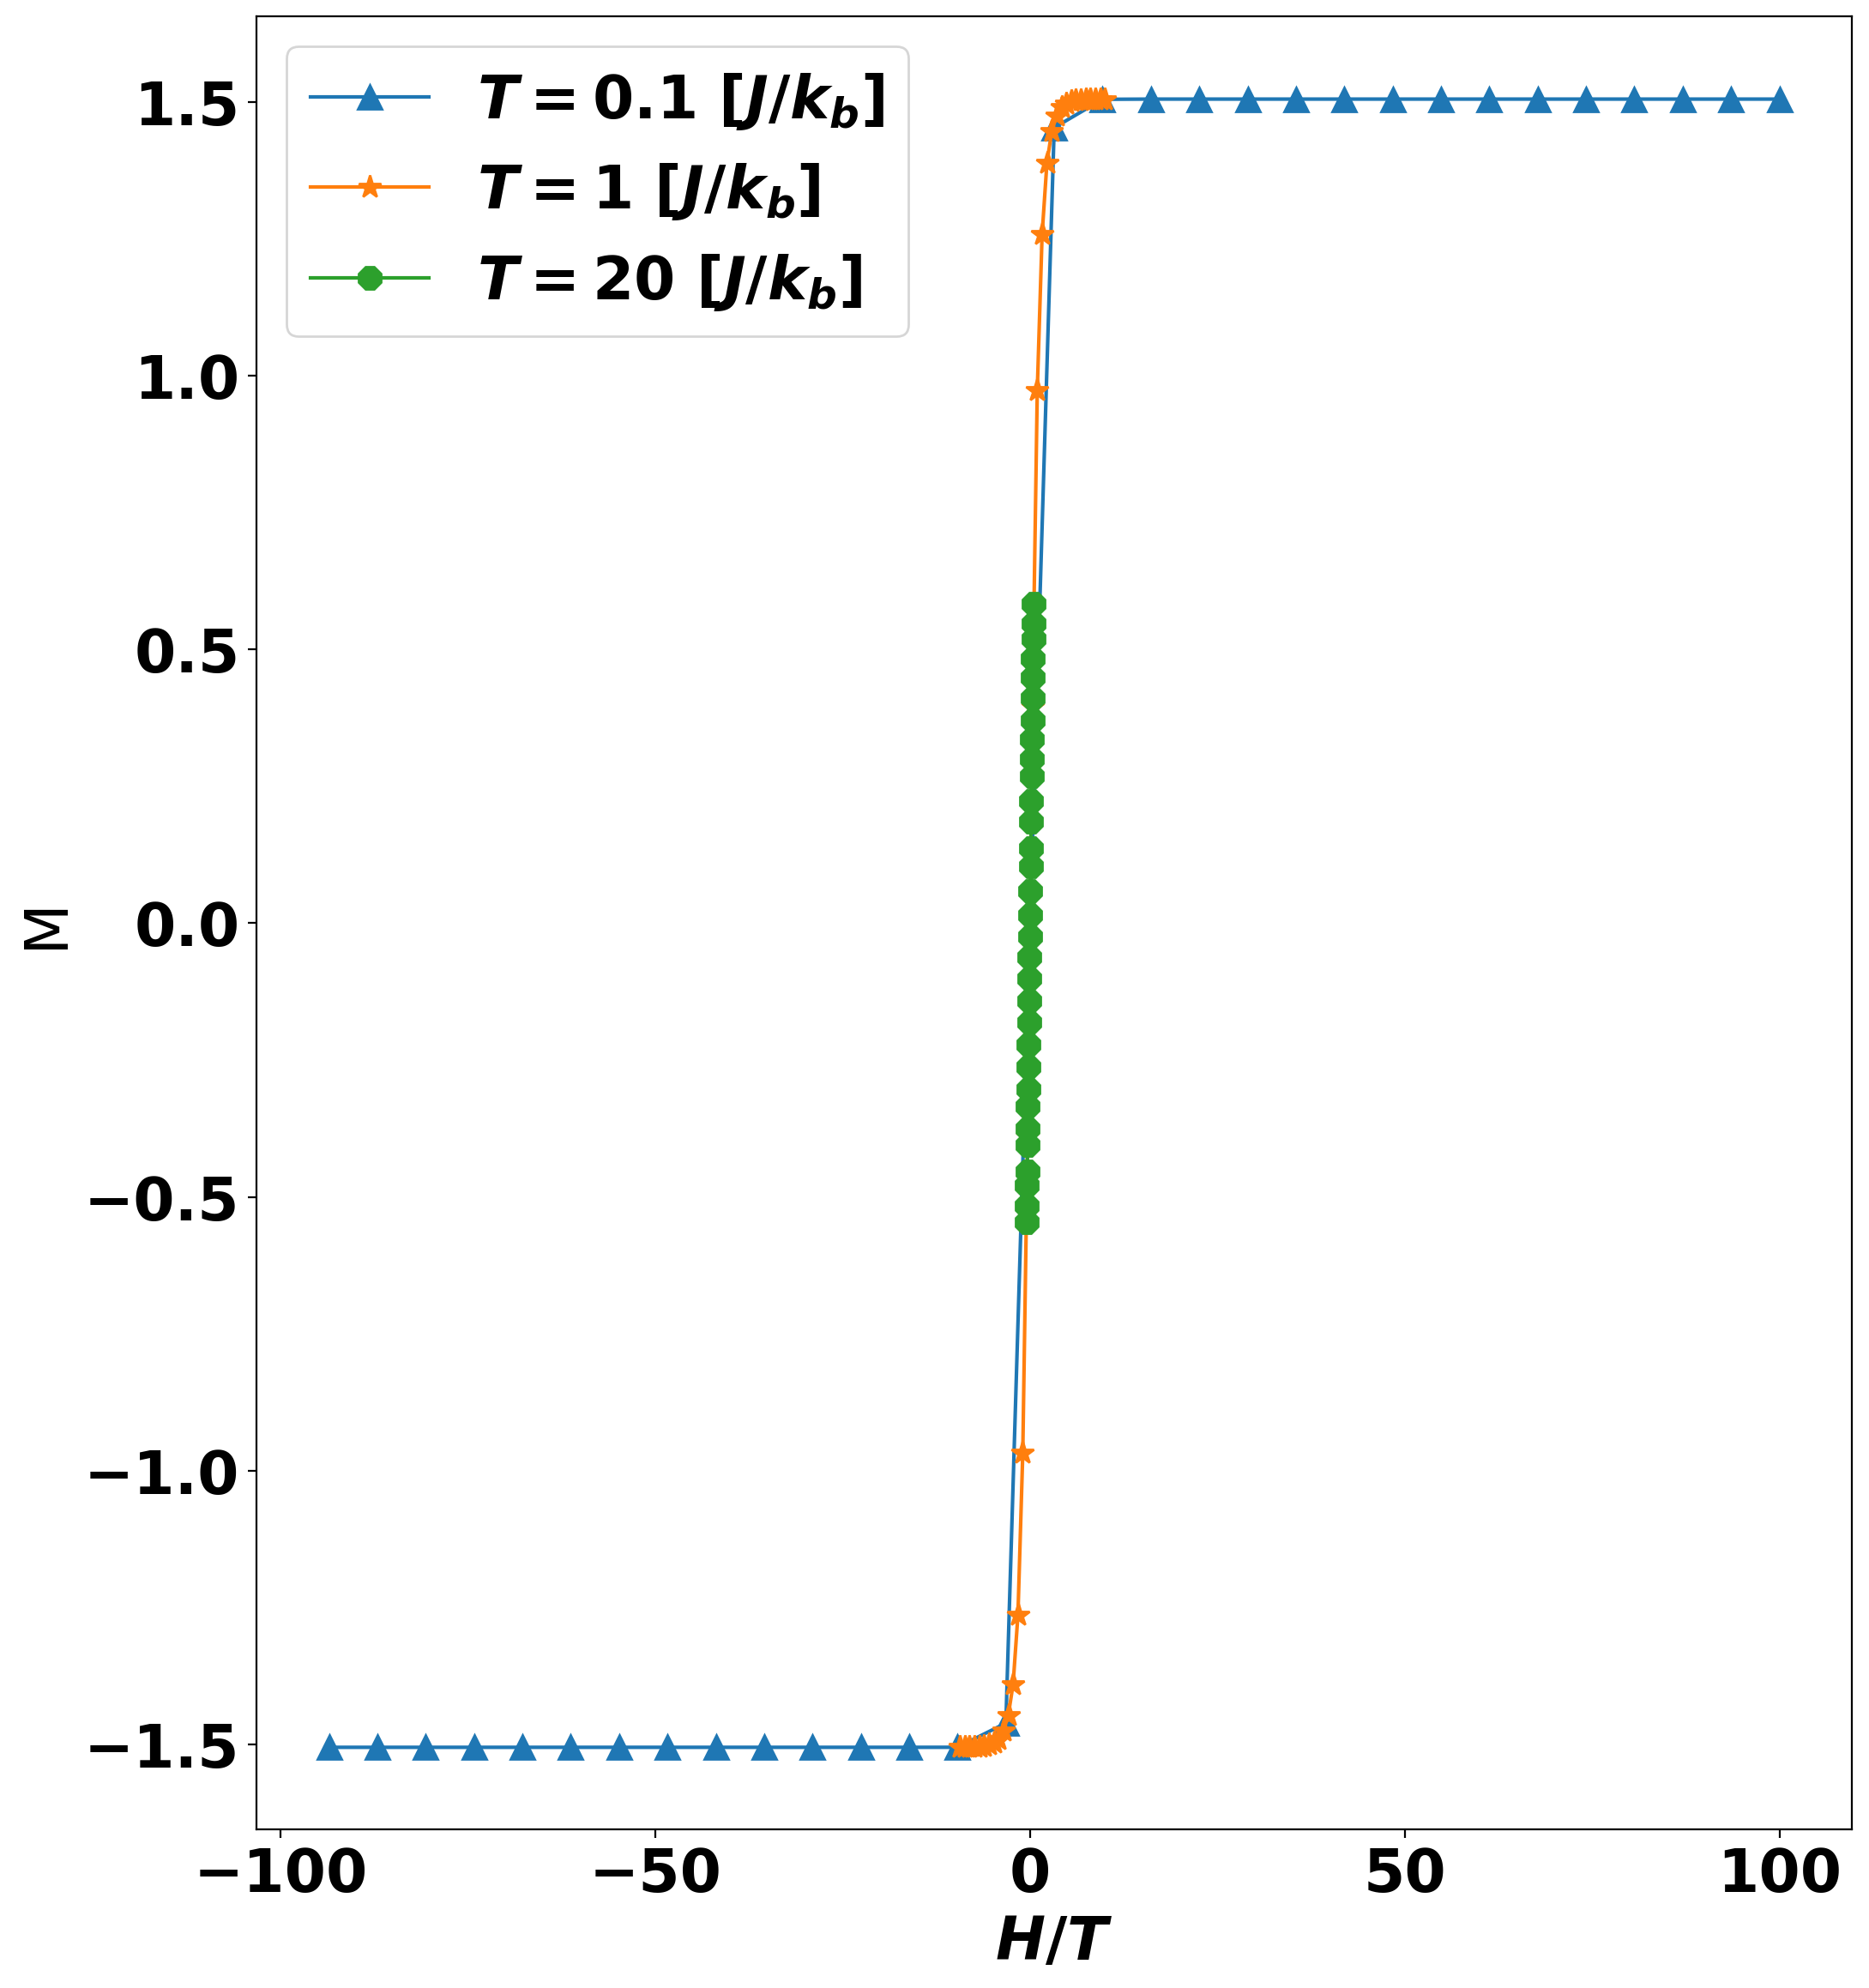

In [108]:
f = plt.figure(figsize=(12 , 14),dpi=200)

mark=["^","*","8"]

for i in range(1,4):
    
    plt.plot(H/Tk[i-1],eval('mm'+str(i)),ms=10,marker=mark[i-1],label='$T=$'+'$'+str(Tk[i-1])+'$'+' '+'$[J/k_{b}]$')
    #ax1.plot(H,ajuste_ising(H,mej_val[0]),ms=5,marker="^",label='Ajuste')
    if i==1 or i==3:
        plt.ylabel('M')
    if i==2 or i==3:
        plt.xlabel('$H/T$')
        
   
    plt.legend()
    
f.savefig('PH_MHT.png')   

plt.show()
    





# Ferromagneto tipo ISING 1/2 (J=1)

# M vs H

In [7]:
pasos=100
eqSteps=2
err_runs=1
spin=build_system([-1,1])
B=10
TT=0.5
Tk1=np.ones(10)*TT

H1=np.linspace(0,B,10)

Tk=np.ones(20)*TT

H2=np.linspace(B,-B,20)

H3=np.linspace(-B,B,20)

J=1

start_time = time.time()

zz1,ee1,mm1,cc1= energ_magc(spin, Tk1, H1, pasos, eqSteps, err_runs)

zz2,ee2,mm2,cc2= energ_magc(zz1, Tk, H2, pasos, eqSteps, err_runs)

zz3,ee3,mm3,cc3= energ_magc(zz2, Tk, H3, pasos, eqSteps, err_runs)

print ("My program took", time.time() - start_time, "to run")



My program took 231.1061065196991 to run


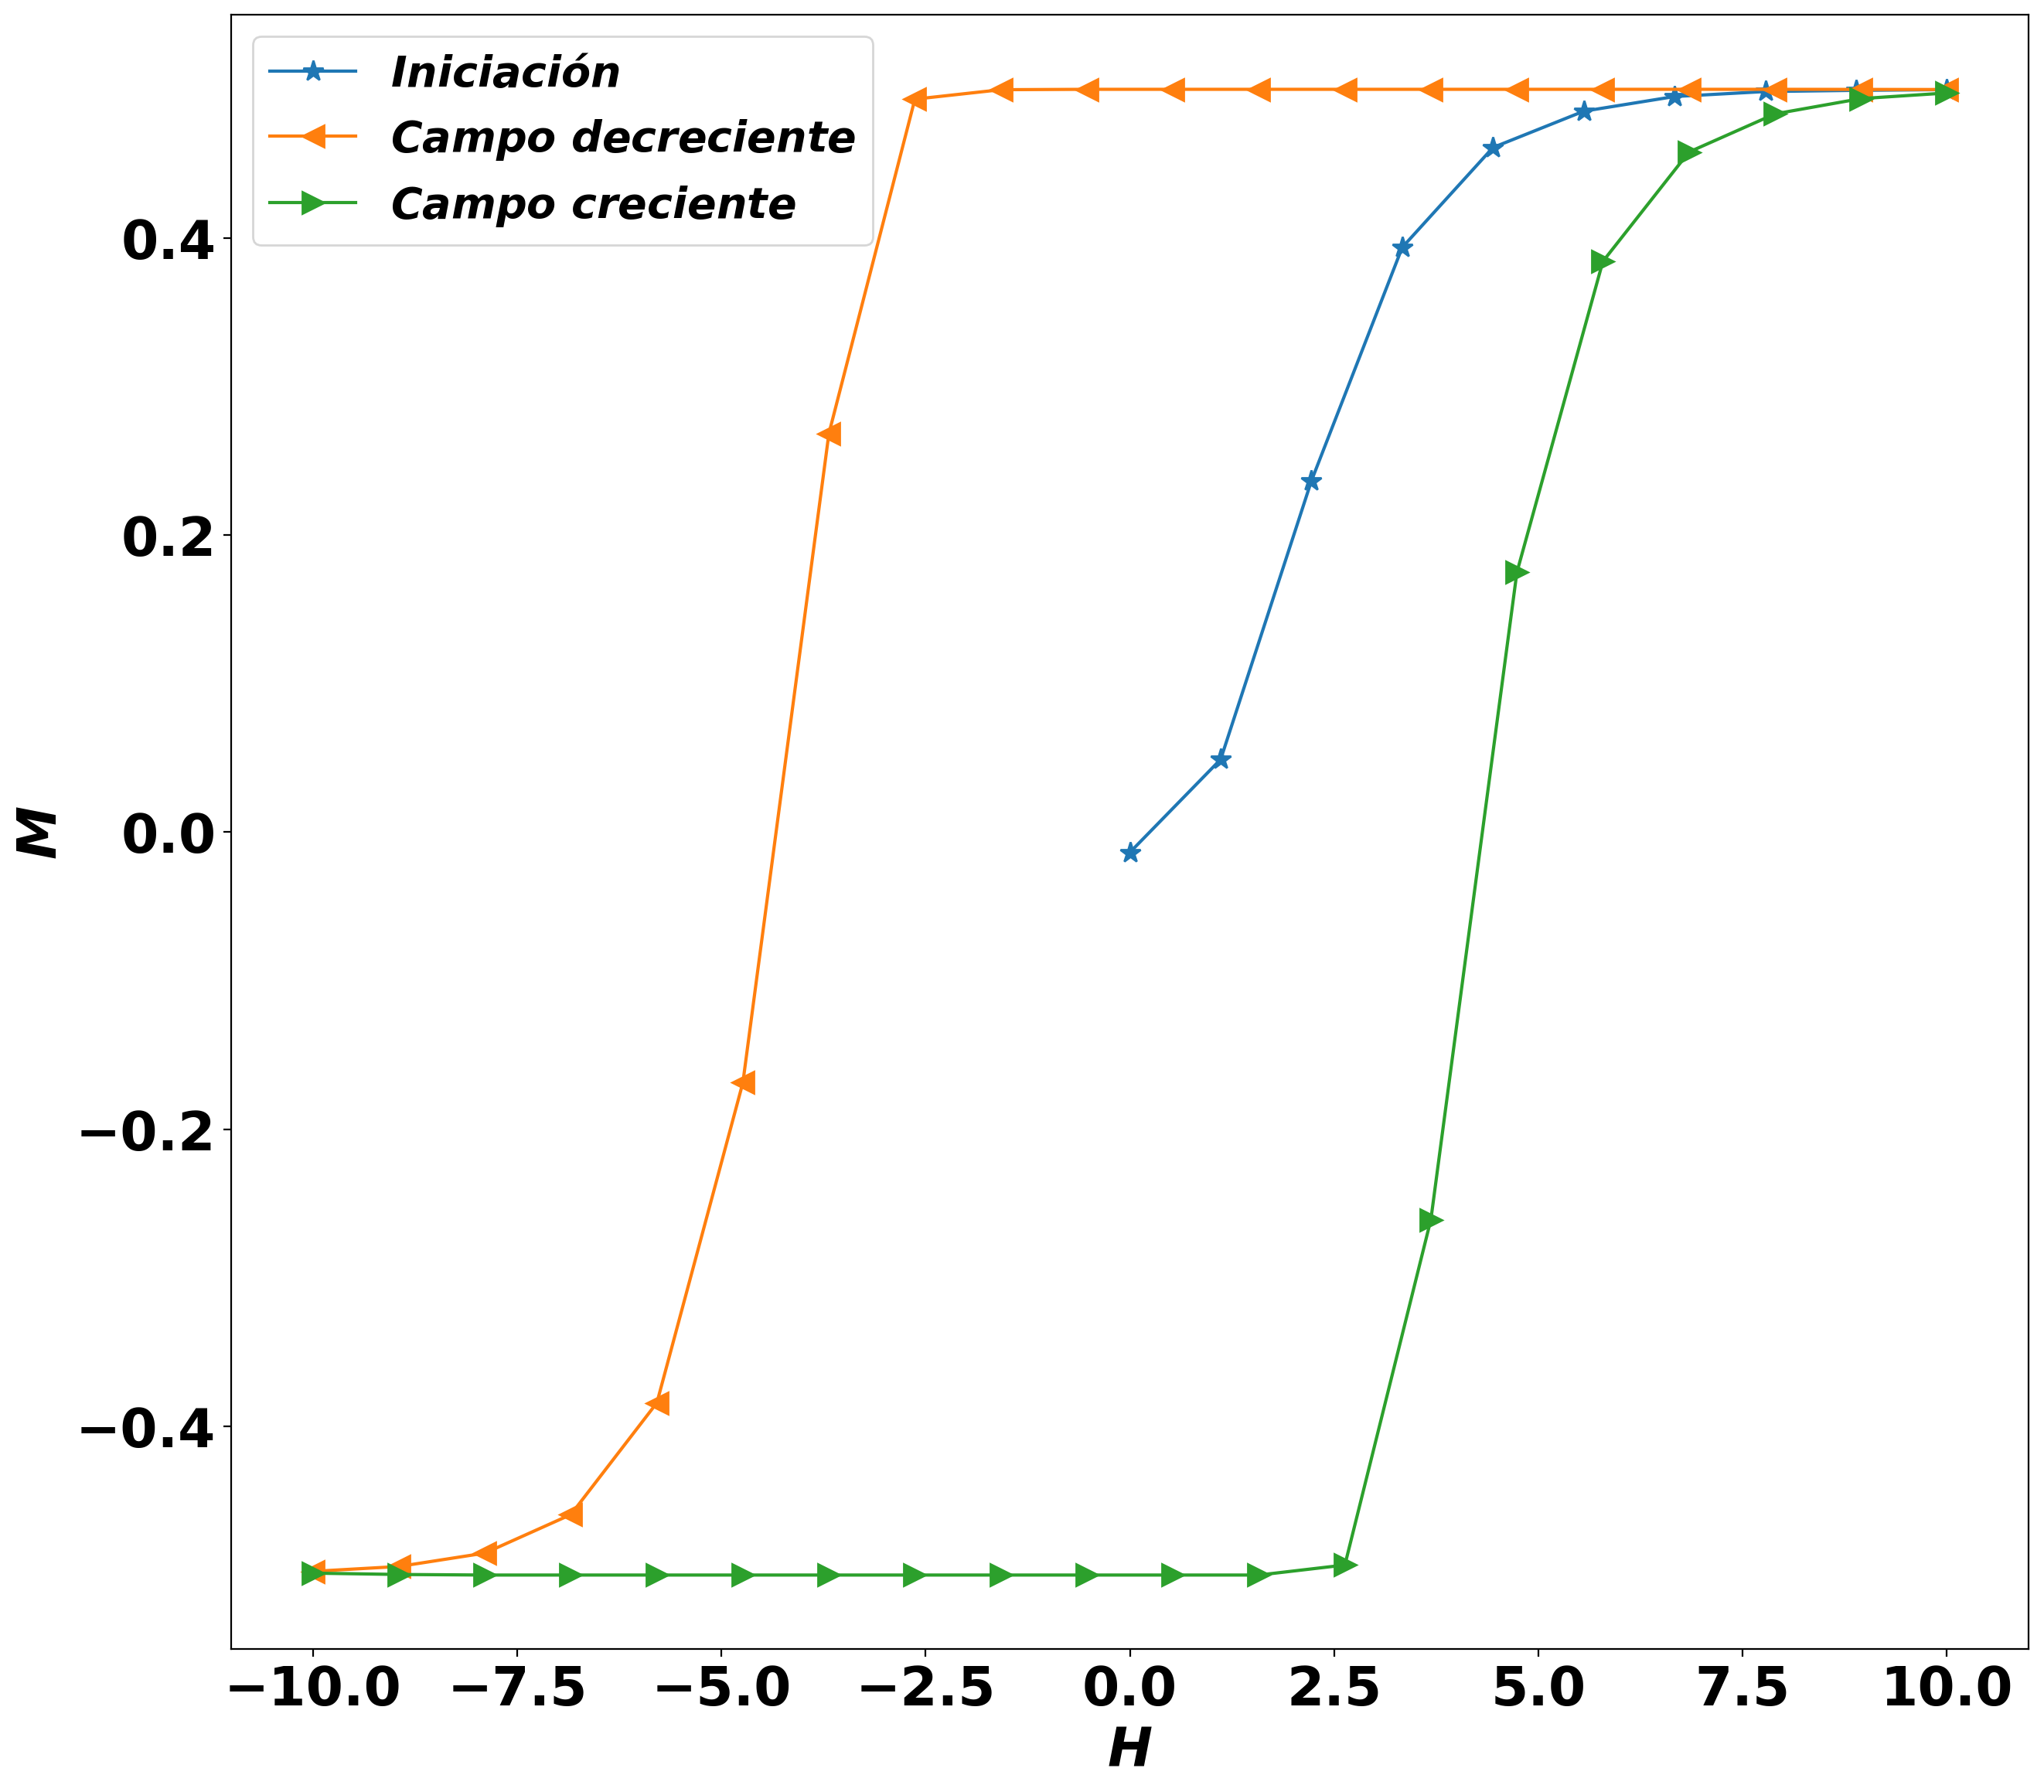

In [17]:
f = plt.figure(figsize=(15 , 14),dpi=200)
ax1 = plt.subplot(1,1,1)
mark=["*","<",">"]

cc=['$Iniciación$','$Campo$'+' '+'$decreciente$','$Campo$'+' '+'$creciente$']
for i in range(1,4):
   
    
    #mej_val, cov = curve_fit(ajuste_ising, H, eval('mm'+str(i))) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    # De acuerdo a la definición de 'model', mej_val[0] es la desviación estandar y mej_val[1] la media.
    #Graficos
  
    ax1.plot(eval('H'+str(i)),np.array(eval('mm'+str(i)))*1/2,ms=10,marker=mark[i-1],label=str(cc[i-1]))
    #ax1.plot(H,ajuste_ising(H,mej_val[0]),ms=5,marker="^",label='Ajuste')
    if i==1:
        plt.ylabel('$M$',fontsize=25)
    if i==2 or i==3:
        plt.xlabel('$H$',fontsize=25)
        
    
    plt.legend(fontsize='20')

f.savefig('FS_MH.png')   

plt.show()
    


# SNAPSHOTS

# Primero verificaremos el número de pasos que se deben implementar para obtener un snapshot esperado en equilibrio, en este caso se usa una temperatura baja, ya que se sabe que se esperarían obtener todos los spines en -1/2


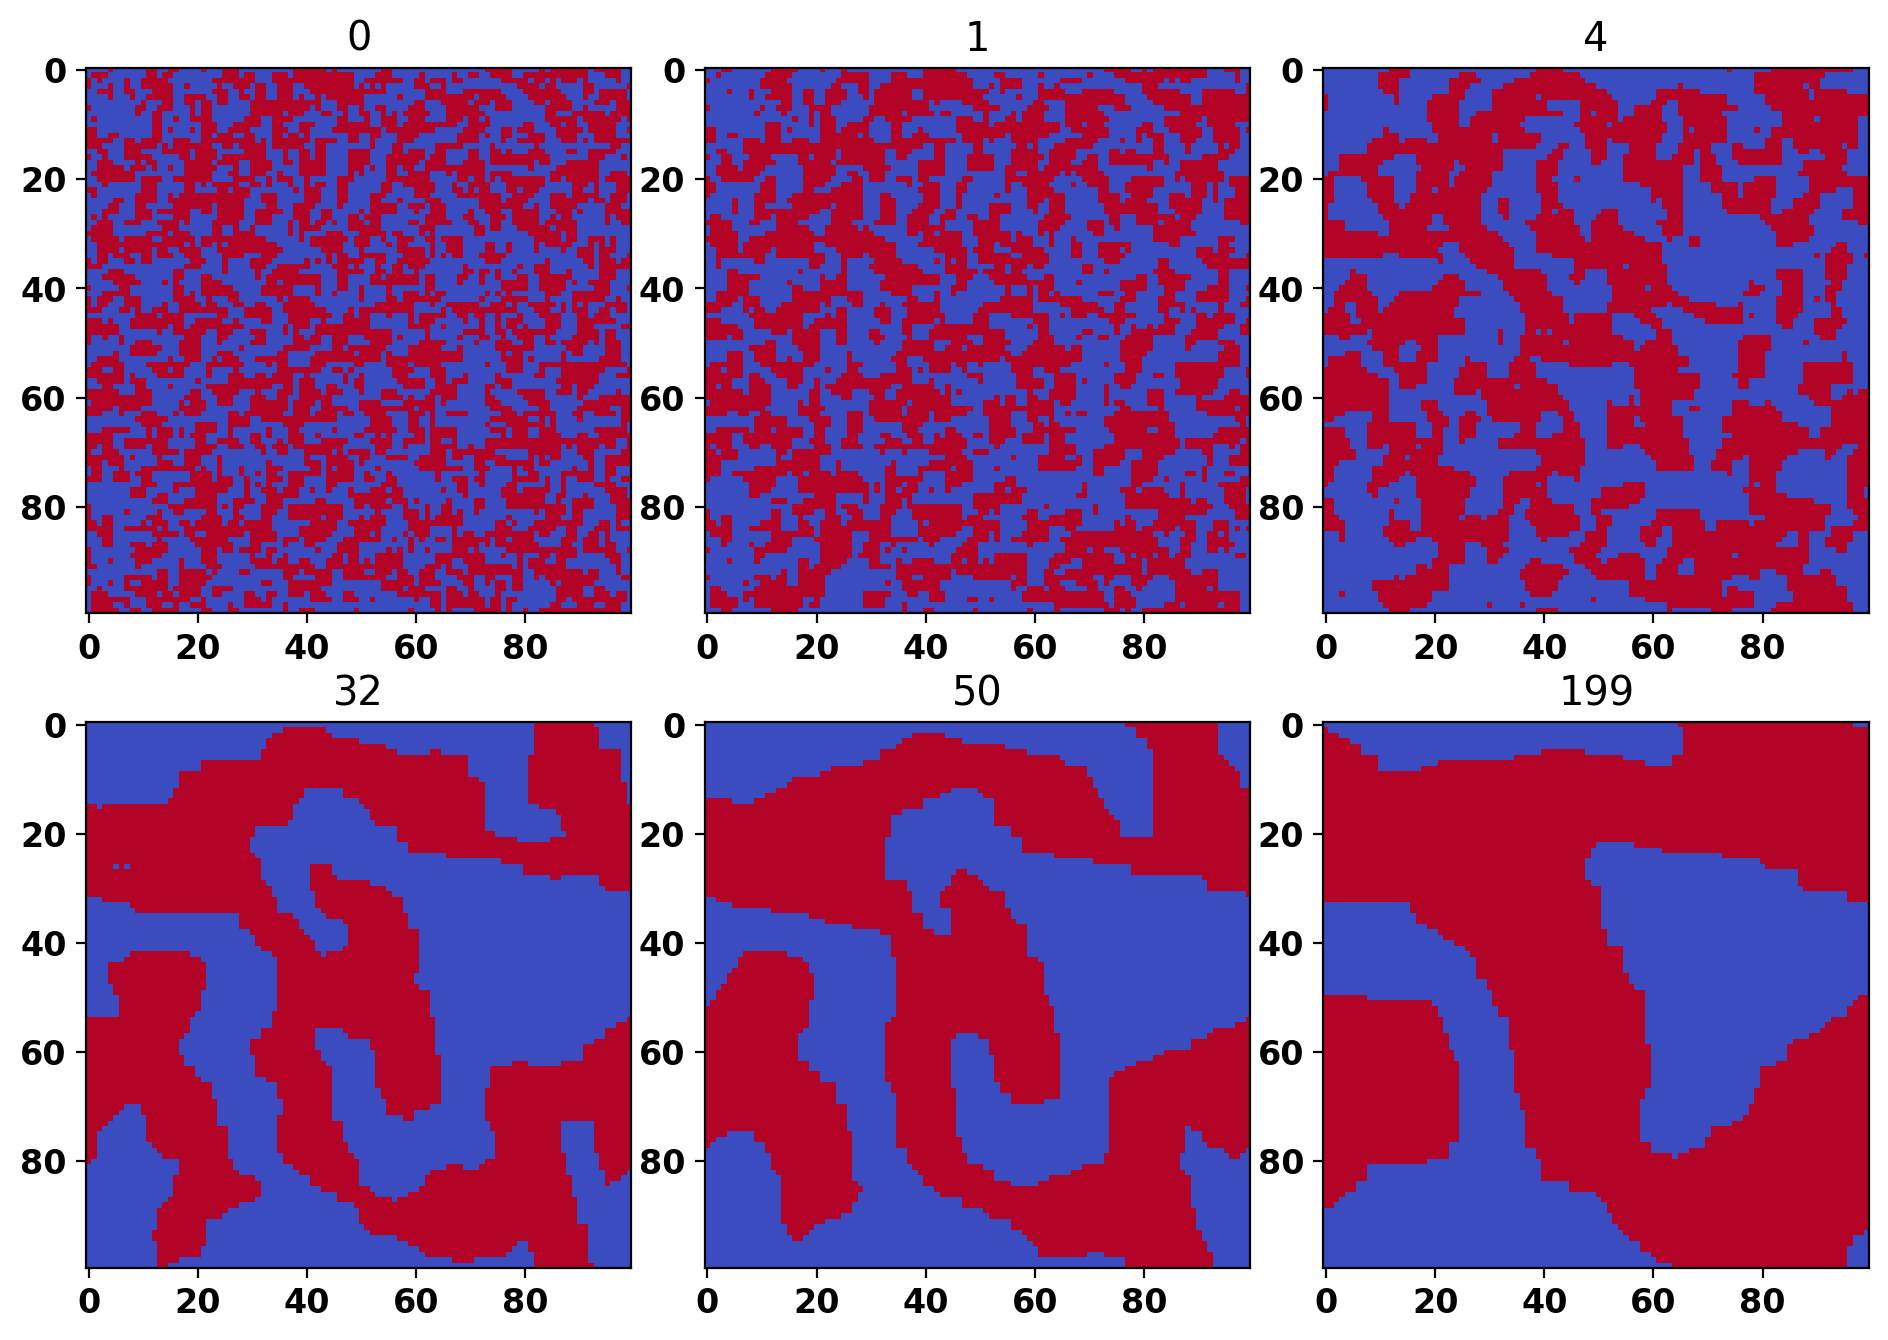

In [8]:
font = {'weight' : 'bold', 'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,12),dpi=200)
Tk=.4
SIZE=100
spin=build_system([1,-1])
Hk=0
J=1


for i in range(0,200):
    
    main(spin,Hk,J,Tk,SIZE*SIZE)
    
    if i == 0:      
        
        ax = fig.add_subplot(2, 3, 1)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(str(i))
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
            
    if i == 1:       
        
        ax = fig.add_subplot(2, 3, 2)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
        
    if i == 4:     
        
        ax = fig.add_subplot(2, 3, 3)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
        
    if i == 32:     
        
        ax = fig.add_subplot(2, 3, 4)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
    if i == 50:     
        
        ax = fig.add_subplot(2, 3, 5)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
    if i == 199:    
                 
                    
    
   
        ax = fig.add_subplot(2, 3, 6)
    
  
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)        
    
    
    

fig.savefig('Snap_shotprueba.jpg')    

plt.show()


# Snapshots para [1, 2, 2.2, 2.5,  3, 5] $J/K_{b}$

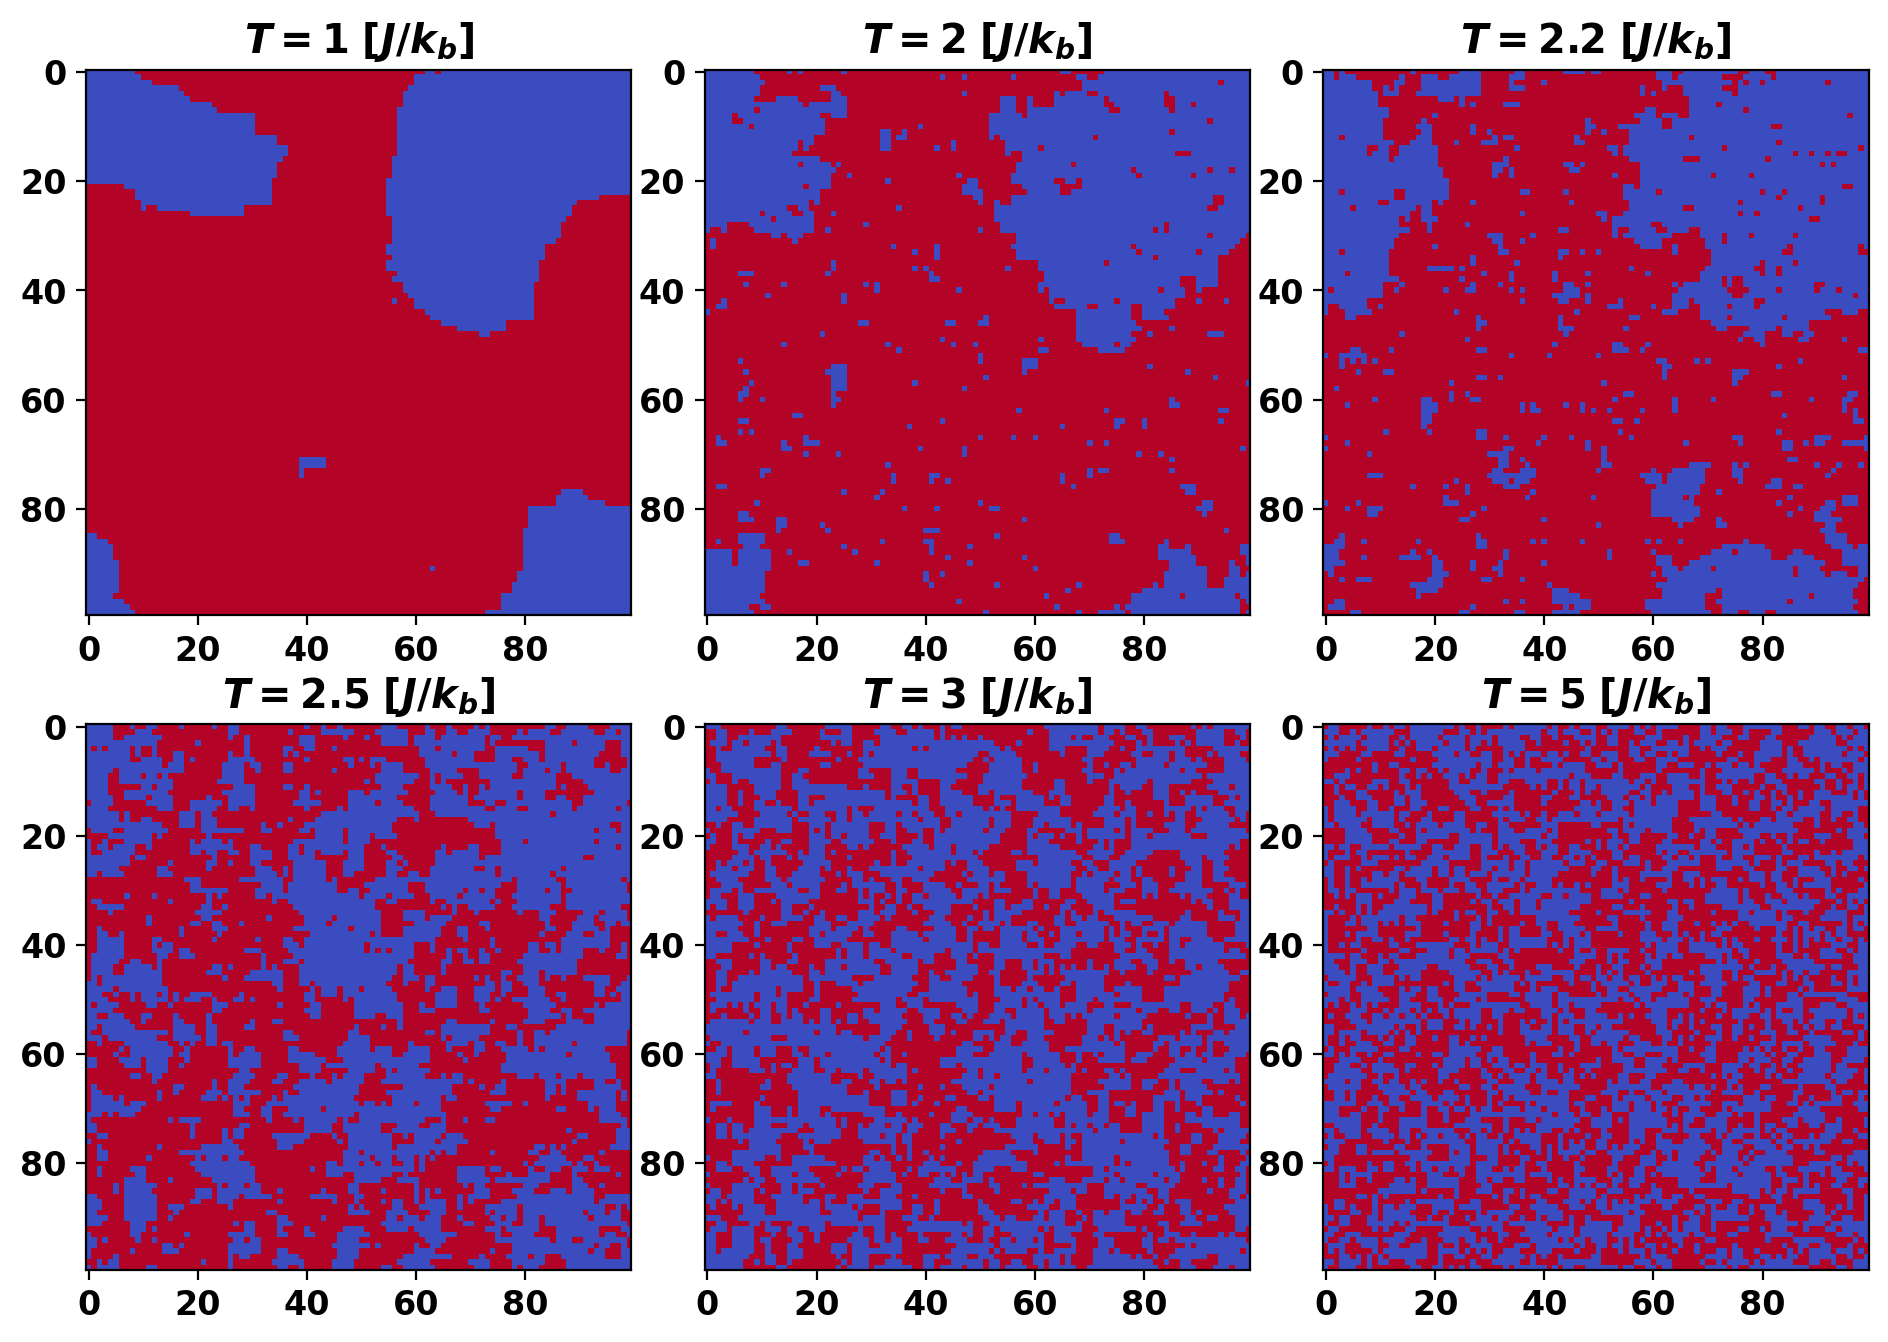

In [12]:
font = {'weight' : 'bold', 'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,12),dpi=200)
Tk=[1,2,2.2,2.5,3,5]
SIZE=100
Hk=0
J=1
spin=build_system([1,-1])
for i in range(len(Tk)):
    
    
    for j in range(0,200):
        
        main(spin,Hk,J,Tk[i],SIZE*SIZE)
    
        if j== 199:      
        
            ax = fig.add_subplot(2, 3, i+1)
            ax.imshow(spin,cmap='coolwarm')
            ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
         
    
    
    

fig.savefig('Snap_shot.jpg')    

plt.show()


# M vs T

In [69]:
pasos=100
SIZE=100
eqSteps=1
err_runs=5
spin=build_system([-1,1])
B=0
TT=1
H1=np.ones(30)*B
T=np.linspace(1.5,3.25,30)
J=1
zz1,ee1,mm1,cc1= energ_magc(spin, T, H1, pasos, eqSteps, err_runs)


In [70]:
T=np.delete(T,0)
mm1=np.delete(mm1,0)
cc1=np.delete(cc1,0)

<ipython-input-46-a7462b679774>:356: RuntimeWarning: invalid value encountered in double_scalars
  MC.append((1-(np.sinh(2*J/T[i]))**(-4))**(1/8))


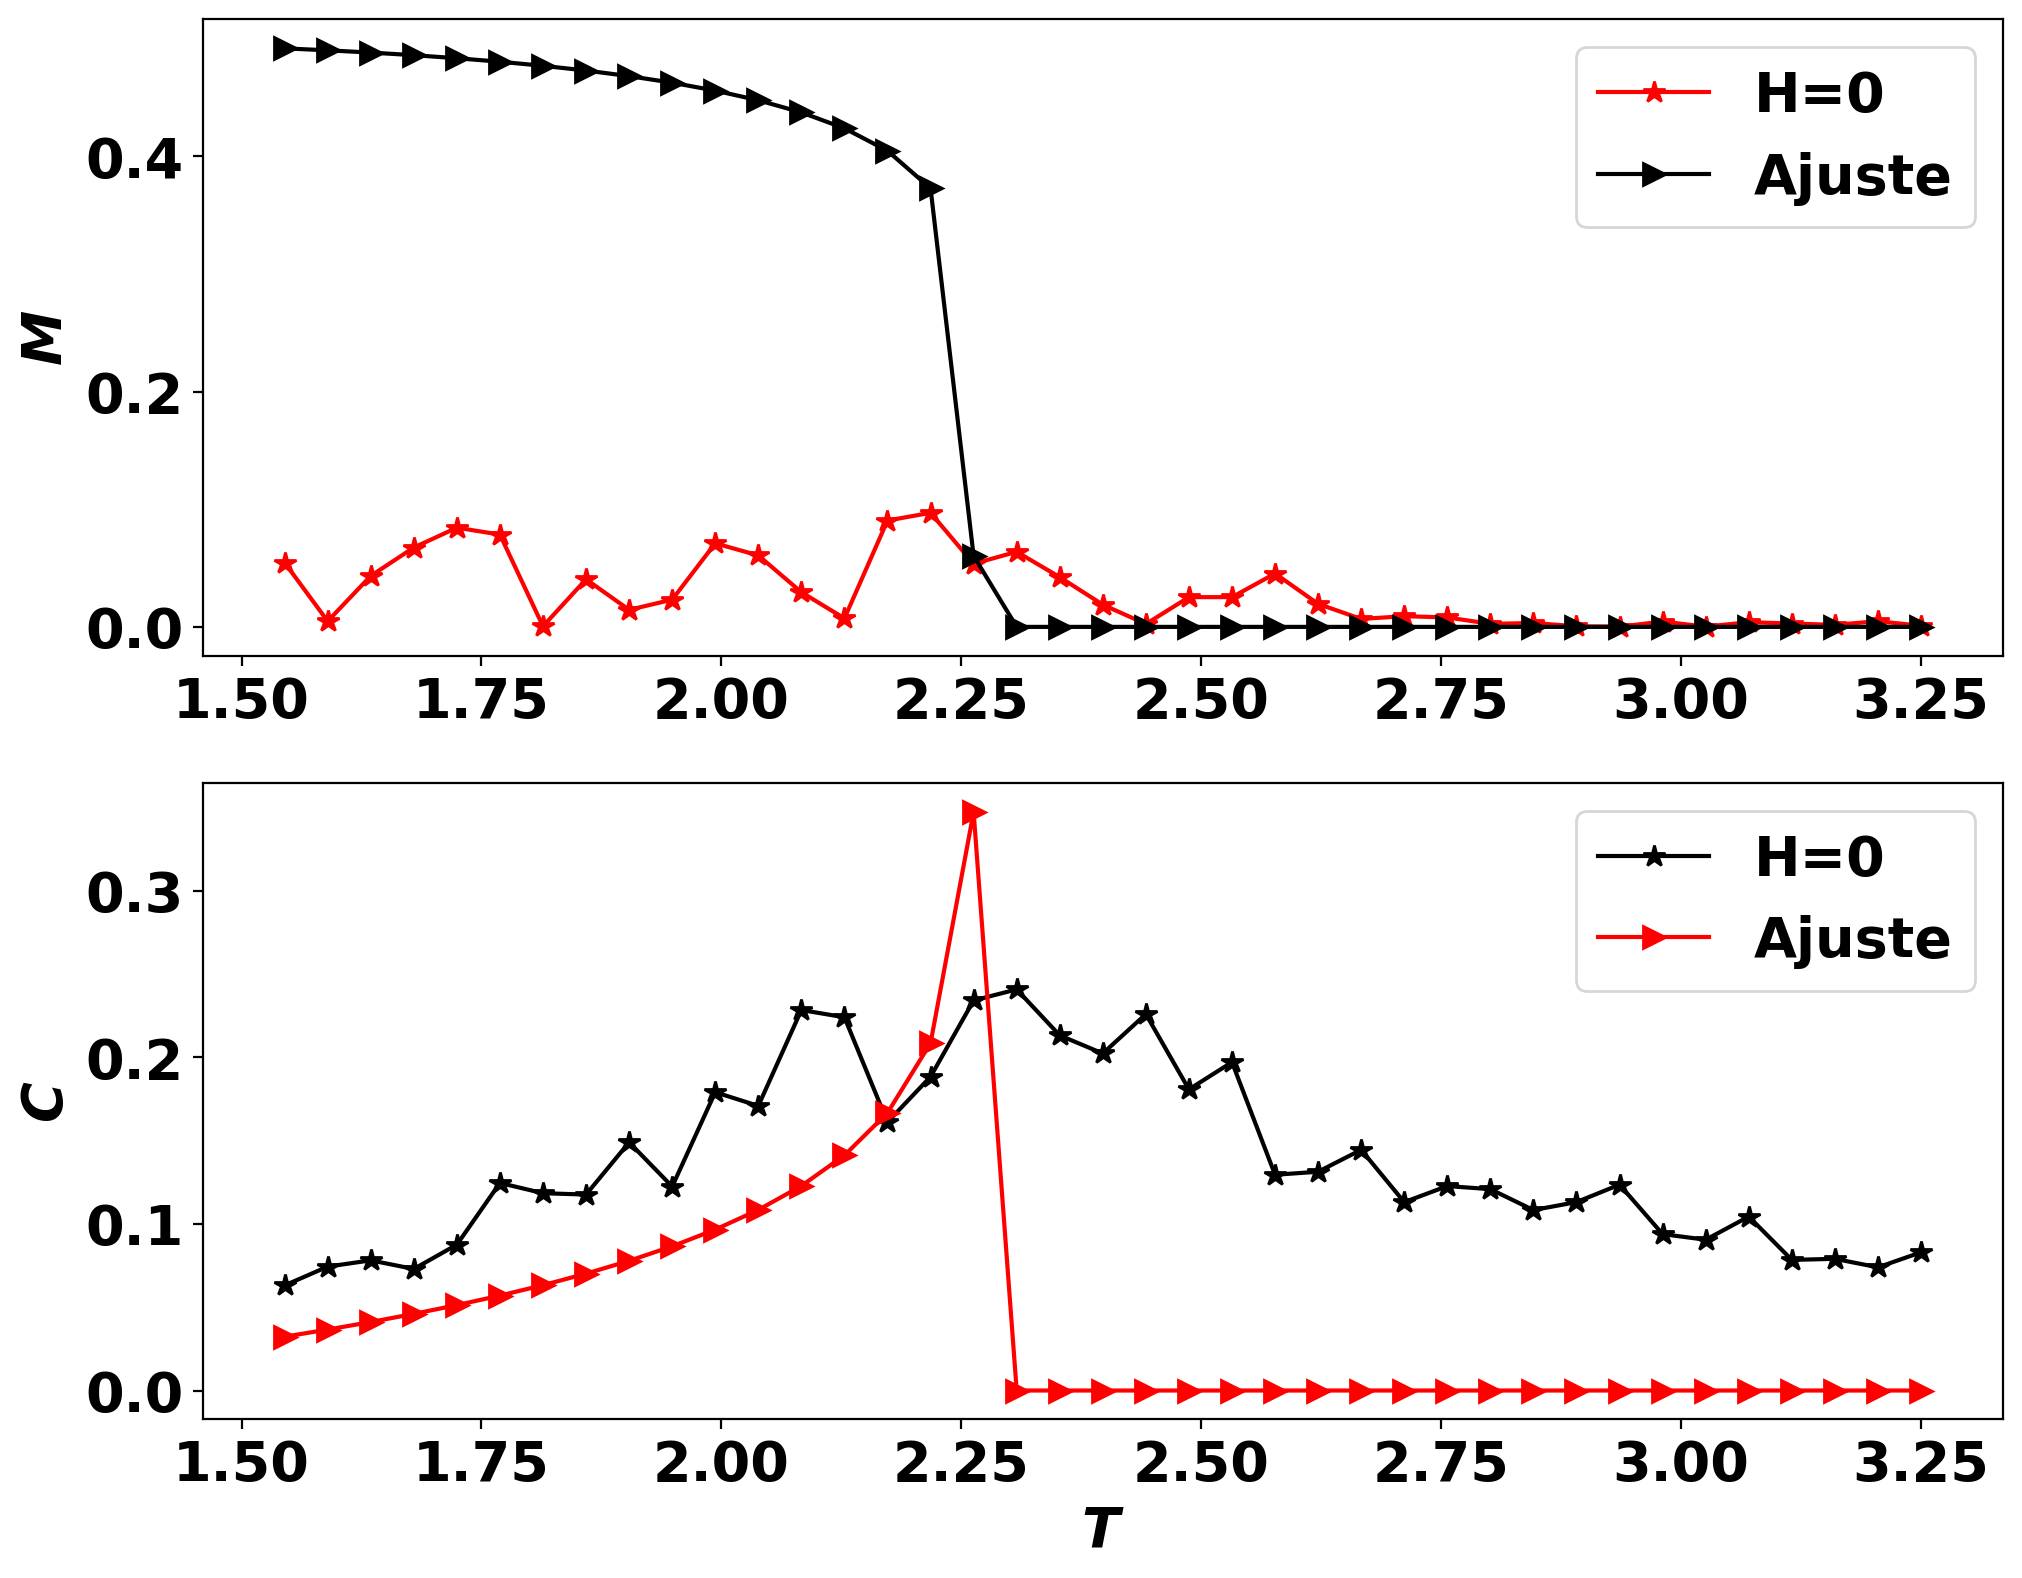

In [71]:
font = {'weight' : 'bold', 'size'   : 20}
matplotlib.rc('font', **font)

#mej_val, cov = curve_fit(ajuste_ising1, T, M)

fig1 = plt.figure(1,figsize=(10,14),dpi=200)

ax1 = plt.subplot(2,1,1)

mej_val1, cov = curve_fit(ajuste_ferro, T, np.abs(mm1)*1/2) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    
plt.plot(T,np.abs(mm1)*1/2,ms=8,color='red',marker="*",label='H='+str(B))

    
plt.plot(T,np.array(ajuste_ferro(T,mej_val1[0]))/2,ms=8,color='black',marker=">",label='Ajuste')

plt.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2) 
    
#plt.plot(T,ajuste_ising1(T,mej_val[0]),ms=5,marker="^",label='Ajuste')
        


plt.ylabel('$M$')


ax1 = plt.subplot(2,1,2)

mej_val, cov = curve_fit(ajuste_capacidad, T, cc1) #Se ajusta la gaussiana, mej_val contiene dos parametros.
plt.plot(T,cc1,ms=8,color='black',marker="*",label='H='+str(B))
plt.plot(T,np.array(ajuste_capacidad(T,mej_val[0])),ms=8,color='red',marker=">",label='Ajuste')
plt.xlabel('$T$')

plt.ylabel('$C$')
    
plt.legend()


fig1.savefig('FS_MC2.png')    

# Red de espines triangular para un antiferromagneto (J=-1)

In [13]:
def ini():
    
    # Función que genera la red triangular
    
    
    # Genera una red de espines triangular, cada espin tendra 6 vecinos
    lista=[-1,1]
    spin=np.zeros((SIZE,SIZE))
    c=0
   
    for i in range(0,len(spin),2):
        for j in range(0,len(spin),2):
            
            if c%2==0:
            
                spin[i,j]=random.choice(lista)
               
            else:
                
                spin[i,j+1]=random.choice(lista)
                
        c+=1
               
    return spin

In [14]:
def energy(spin,i,j,J,H): #Energía de en la ubicación i,j de la red triangular
    #spin: configuración de espines 
    # i: fila i-esima
    # j: columna j-esima
    # J: Integral de intercambio
    # H: Campo magnetico
    
    N=len(spin)
   #Energía por sitio  
    return -J*spin[i,j]*(spin[(i+2)%N,(j+1)%N] + spin[i,(j+2)%N] + spin[(i-2)%N,(j-1)%N] + spin[i,(j-2)%N]+ spin[(i-2)%N,(j+1)%N]+ spin[(i+2)%N,(j-1)%N] + spin[(i-2)%N,(j-2)%N])-H*spin[i,j]

In [15]:
def main(spin,H,J,T,steps,condition='ISING'): #Metopolis y montecarlo
    # recibe la configuraciones de espines actual, campo magnetico, integral de intercambio,
    #temperatura, número de pasos de Montecarlo y sí el modelo es ISING o Heisenberg.
    
    if condition=='ISING':
        
        
        for k in range(steps):
        

            j=np.random.randint(0,SIZE)
        
            i=np.random.randint(0,SIZE)
            
            if spin[i,j]!=0:
        
                Delta_E=-2.*energy(spin,i,j,J,H)
        
            #Esta parte se debe modifical en caso de querer hacer el codigo para 3/2
                if Delta_E <= 0.:
                    spin[i,j]*=-1
                elif np.exp(-1./T*Delta_E) >= np.random.rand():
                    spin[i,j]*=-1
            
        return spin

# M vs H

In [97]:
pasos=100
eqSteps=2
err_runs=1
SIZE=10
spin=ini()
B=10
TT=0.5
Tk1=np.ones(10)*TT
H1=np.linspace(0,B,10)
Tk=np.ones(20)*TT
H2=np.linspace(B,-B,20)
H3=np.linspace(-B,B,20)
J=-1
start_time = time.time()


zz1,ee1,mm1,cc1= energ_magc(spin, Tk1, H1, pasos, eqSteps, err_runs)

zz2,ee2,mm2,cc2= energ_magc(zz1, Tk, H2, pasos, eqSteps, err_runs)

zz3,ee3,mm3,cc3= energ_magc(zz2, Tk, H3, pasos, eqSteps, err_runs)

print ("My program took", time.time() - start_time, "to run")



My program took 843.382917881012 to run


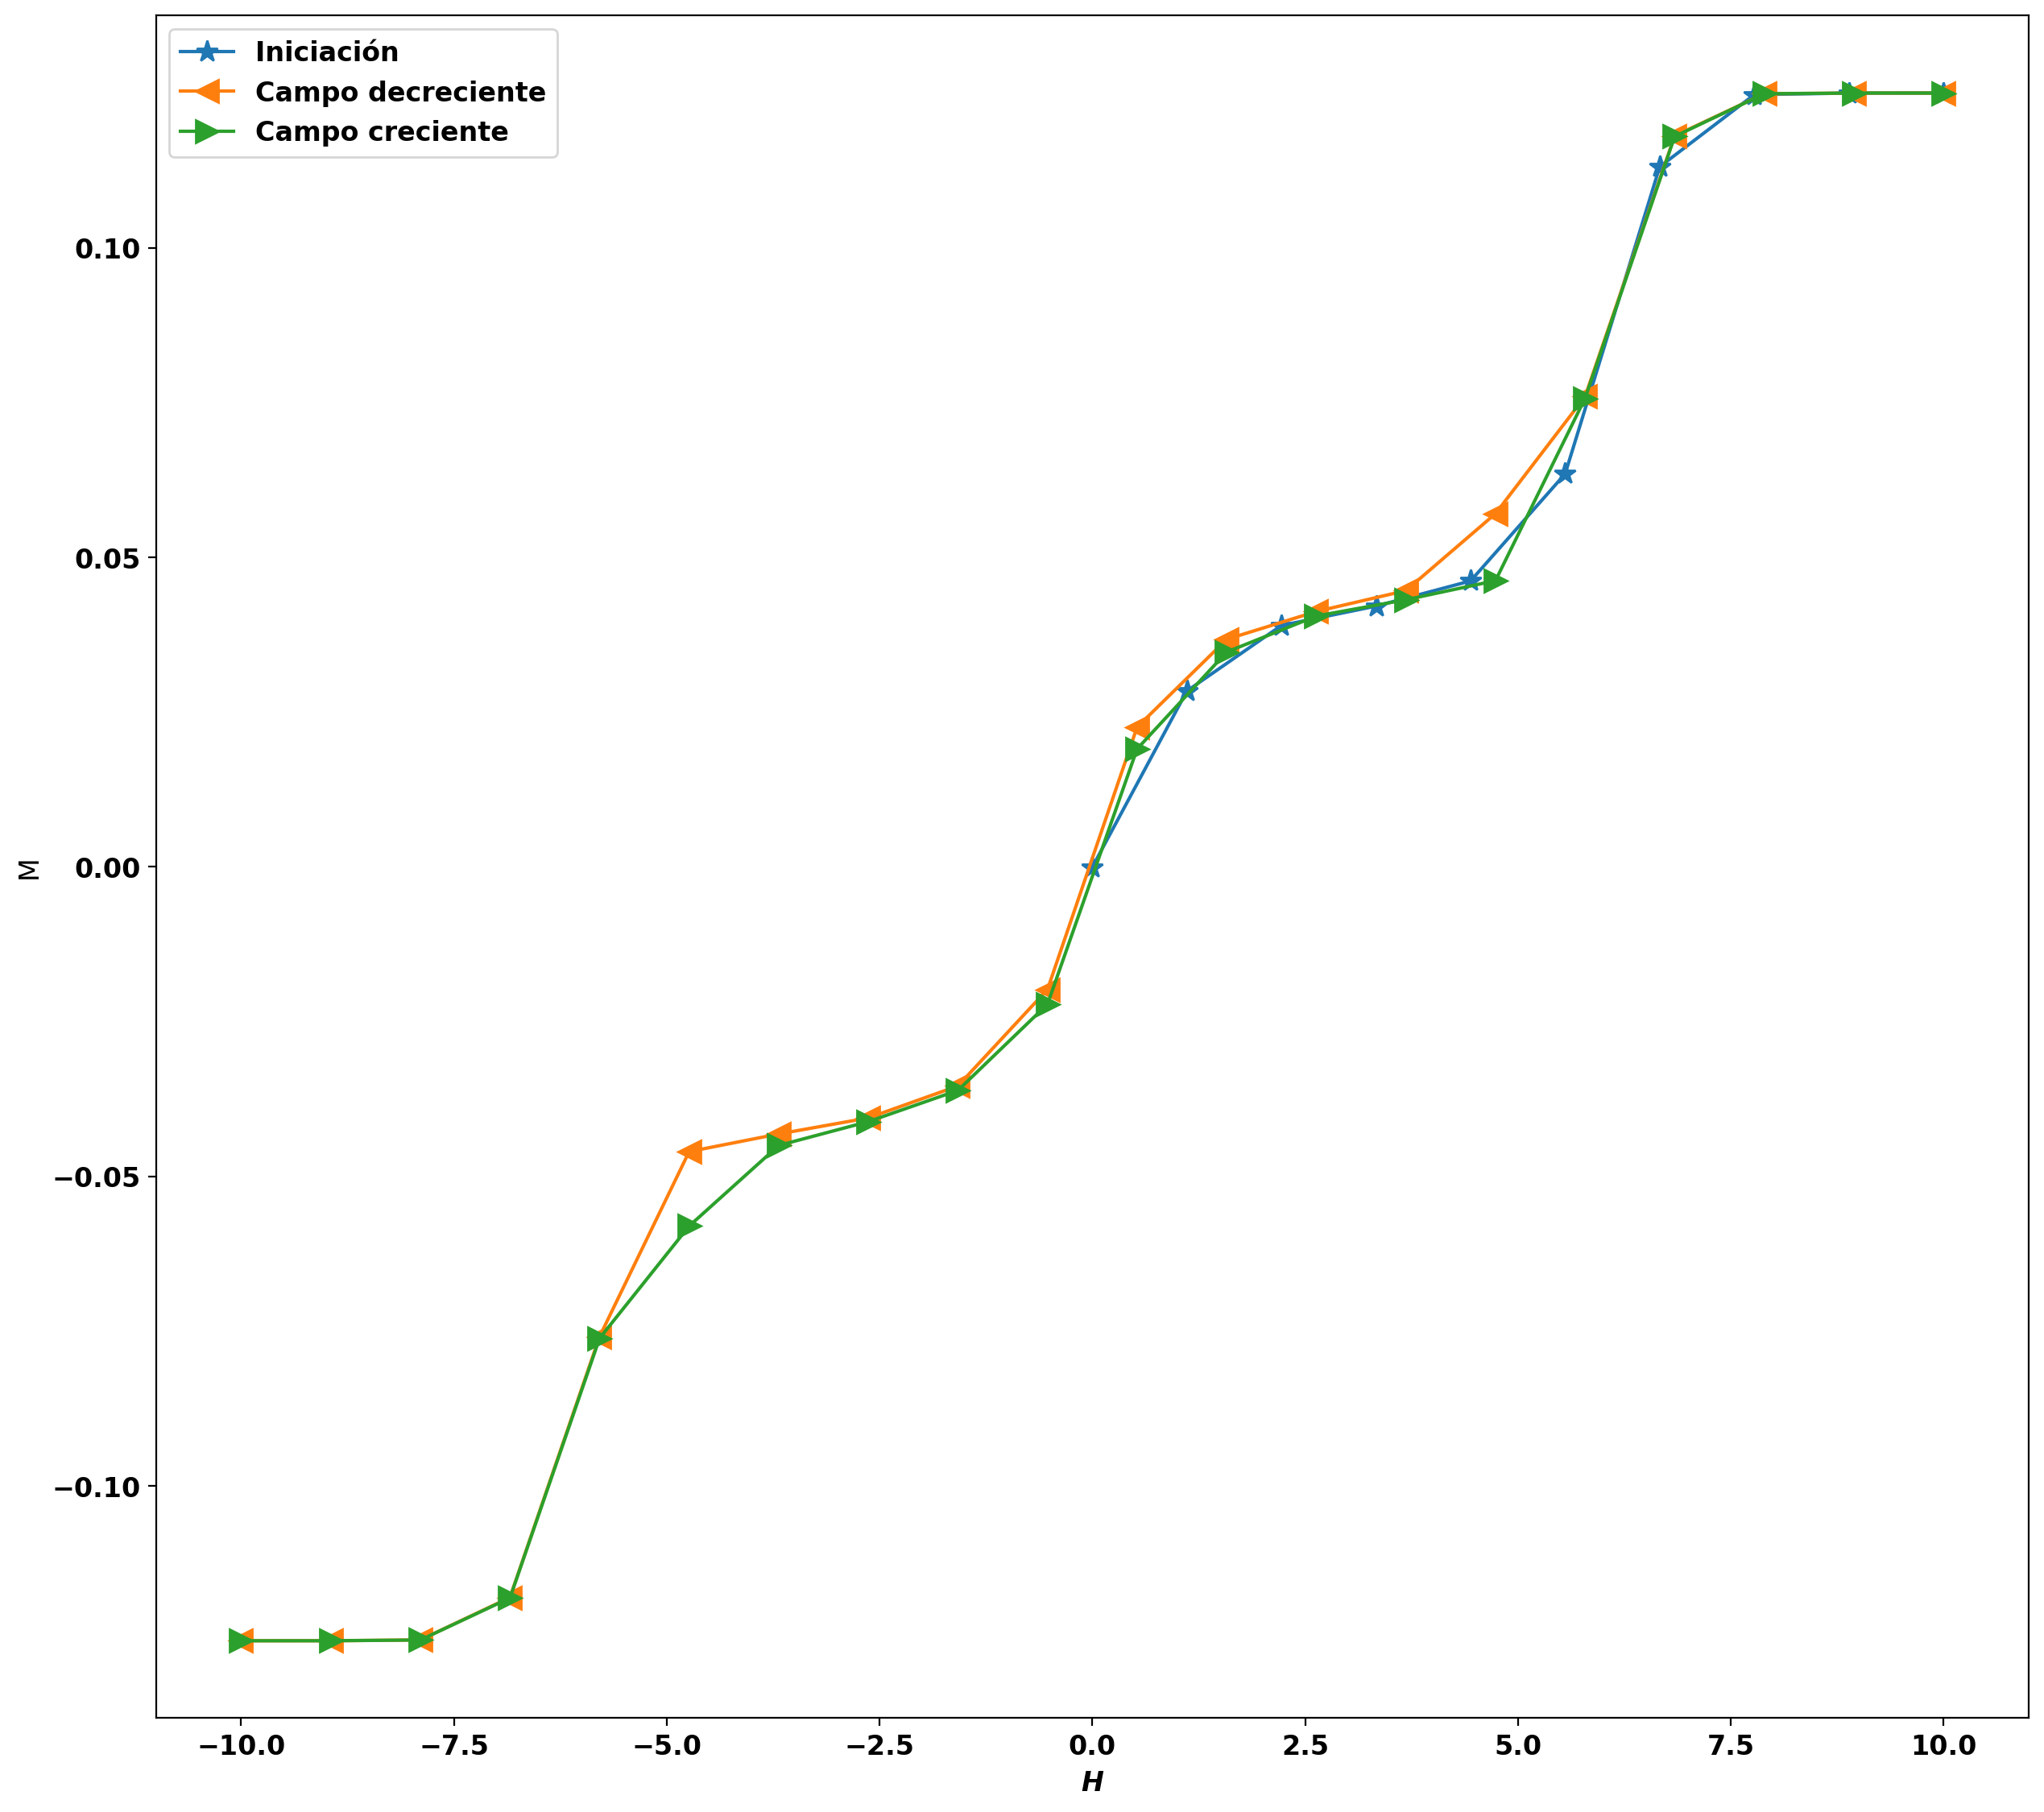

In [98]:
f = plt.figure(figsize=(15 , 14),dpi=200)
ax1 = plt.subplot(1,1,1)
mark=["*","<",">"]

cc=['Iniciación','Campo decreciente','Campo creciente']
for i in range(1,4):
   
    
    #mej_val, cov = curve_fit(ajuste_ising, H, eval('mm'+str(i))) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    # De acuerdo a la definición de 'model', mej_val[0] es la desviación estandar y mej_val[1] la media.
    #Graficos
  
    ax1.plot(eval('H'+str(i)),np.array(eval('mm'+str(i)))*1/2,ms=10,marker=mark[i-1],label=str(cc[i-1]))
    #ax1.plot(H,ajuste_ising(H,mej_val[0]),ms=5,marker="^",label='Ajuste')
    if i==1 or i==3:
        plt.ylabel('M')
    if i==2 or i==3:
        plt.xlabel('$H$')
        
    
    plt.legend()

f.savefig('AS_MH.png')   

plt.show()
    


# SNAPSHOTS

# Primero verificaremos el número de pasos que se deben implementar para obtener un snapshot esperado en equilibrio, en este caso se usa una temperatura baja, ya que se sabe que se esperarían obtener todos los spines en -1/2


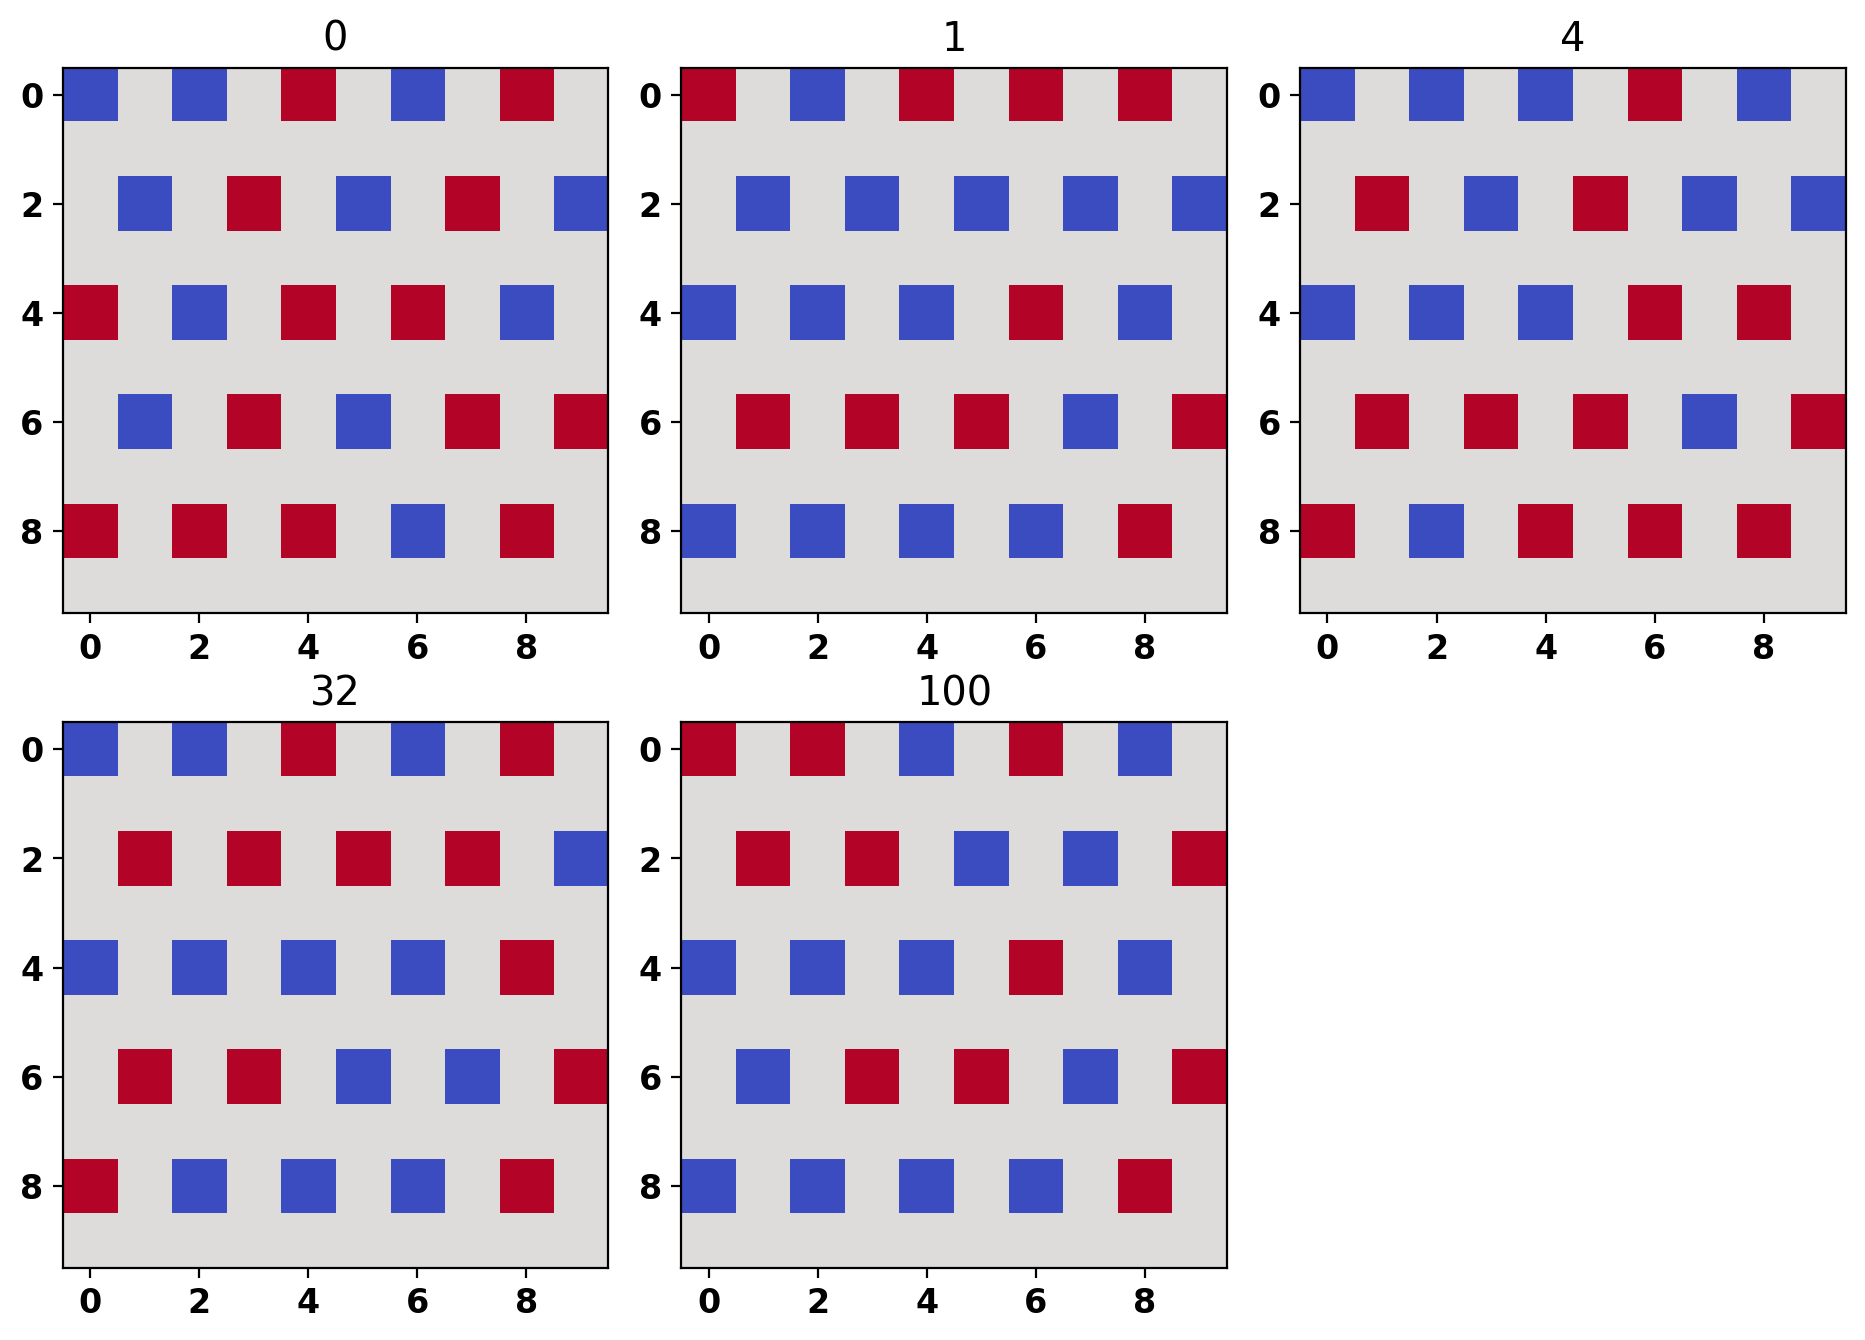

In [7]:
font = {'weight' : 'bold', 'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,12),dpi=200)
Tk=10
SIZE=10
spin=ini()
Hk=0
J=-1

for i in range(0,249):
    
    main(spin,Hk,J,Tk,10*SIZE*SIZE)
    
    if i == 0:      
        
        ax = fig.add_subplot(2, 3, 1)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(str(i))
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
            
    if i == 1:       
        
        ax = fig.add_subplot(2, 3, 2)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
        
    if i == 4:     
        
        ax = fig.add_subplot(2, 3, 3)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
        
    if i == 32:     
        
        ax = fig.add_subplot(2, 3, 4)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
    if i == 100:     
        
        ax = fig.add_subplot(2, 3, 5)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
    if i == 249:    
                 
                    
    
   
        ax = fig.add_subplot(2, 3, 6)
    
  
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text(i)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)        
    
    
    

fig.savefig('Snap_shotpruebaA.jpg')    

plt.show()


# Snapshots para [1, 2, 2.2, 2.5,  3, 5] $J/K_{b}$

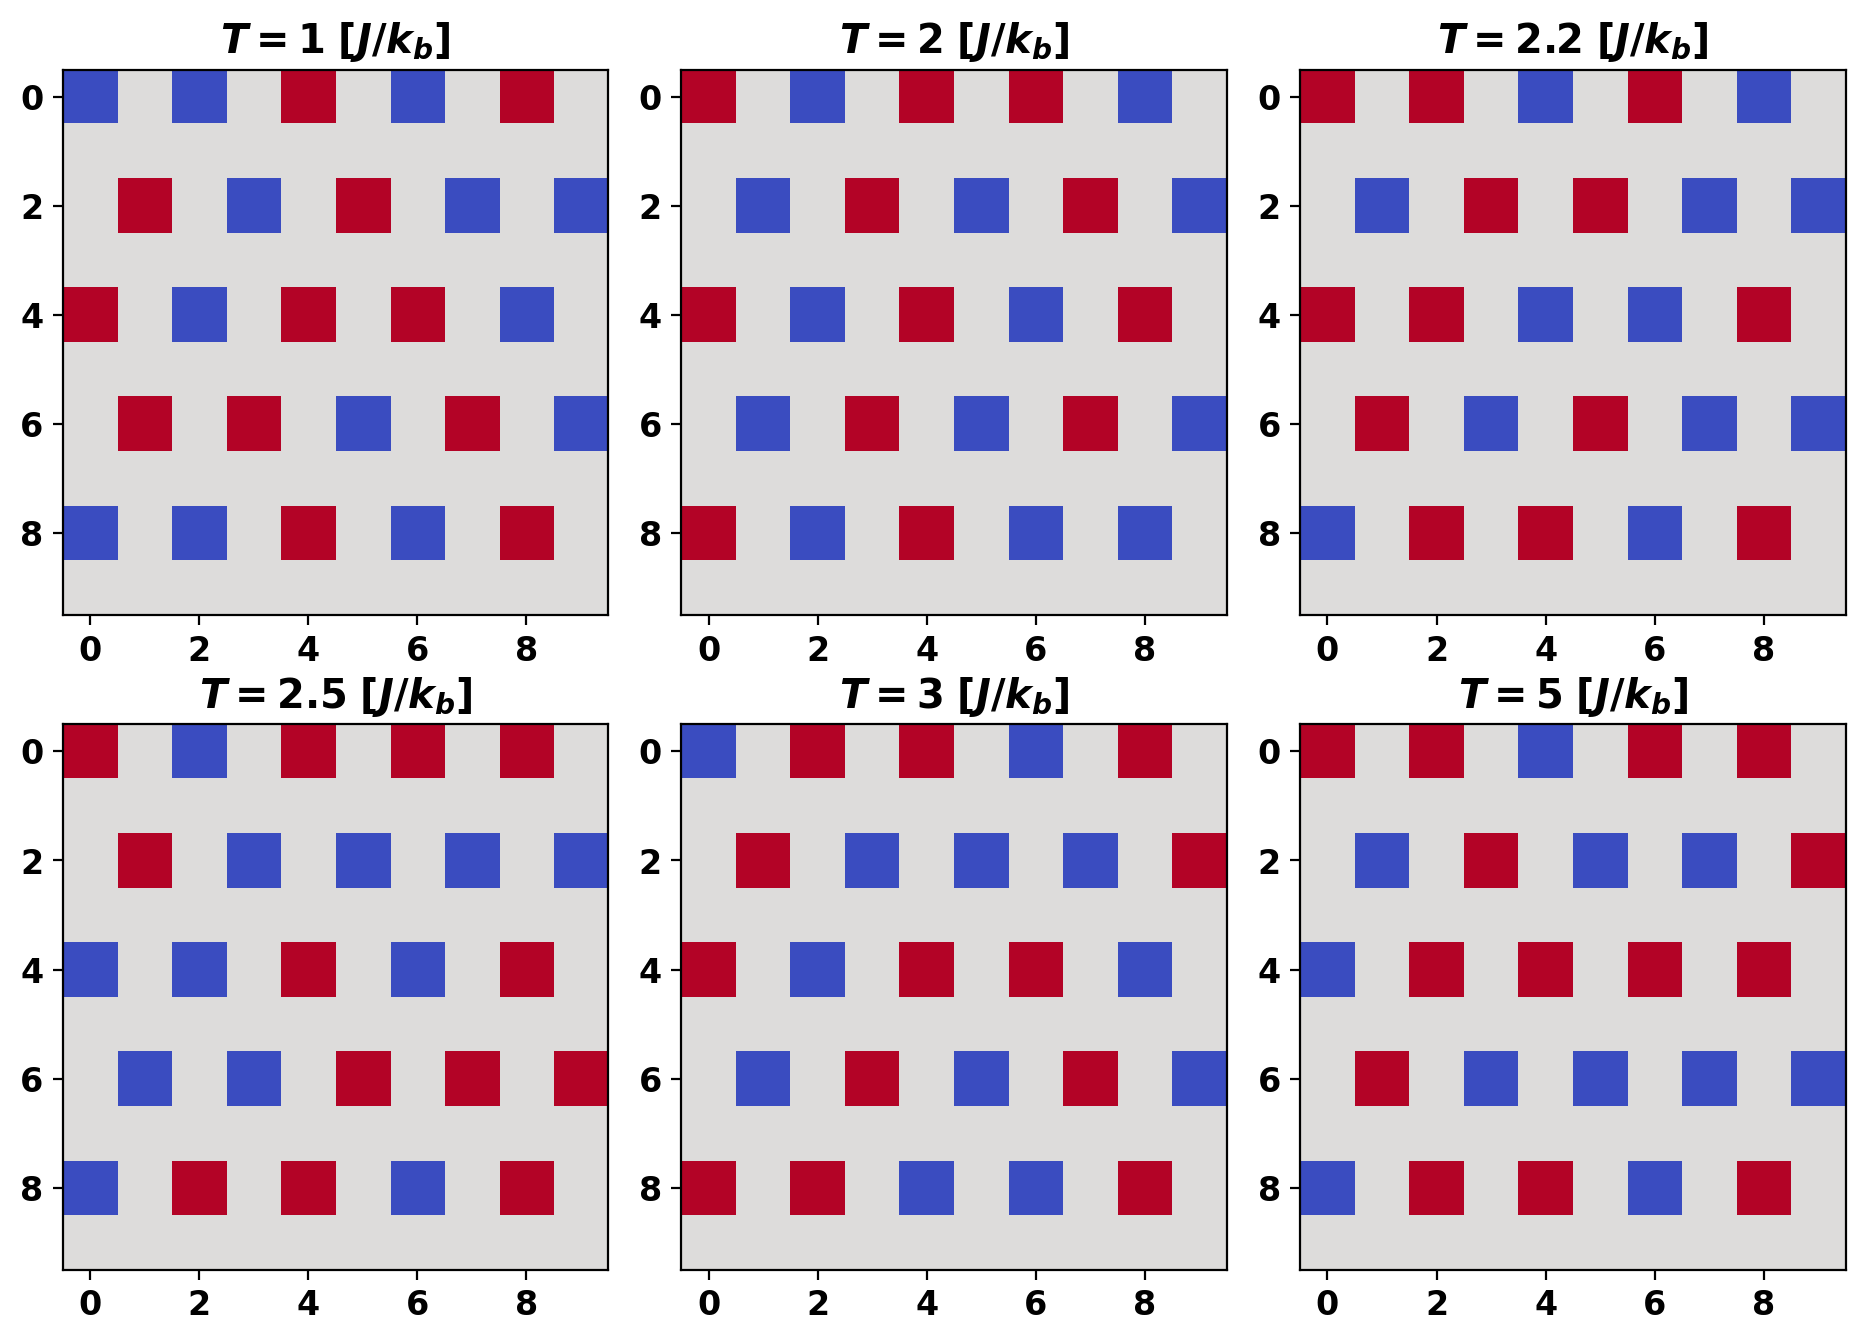

In [8]:
font = {'weight' : 'bold', 'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,12),dpi=200)
Tk=[1,2,2.2,2.5,3,5]
SIZE=10
Hk=0
J=-1
for i in range(0,6):
    spin=ini()
    for j in range(0,249):
    
        main(spin,Hk,J,Tk[i],SIZE*SIZE)
    
    if i == 0:      
        
        ax = fig.add_subplot(2, 3, 1)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
            
    if i == 1:       
        
        ax = fig.add_subplot(2, 3, 2)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
        
    if i == 2:     
        
        ax = fig.add_subplot(2, 3, 3)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
        
    if i == 3:     
        
        ax = fig.add_subplot(2, 3, 4)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
    if i == 4:     
        
        ax = fig.add_subplot(2, 3, 5)
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)    
        
    if i == 5:    
                 
                    
    
   
        ax = fig.add_subplot(2, 3, 6)
    
  
        ax.imshow(spin,cmap='coolwarm')
        ax.title.set_text('$T=$'+'$'+str(Tk[i])+'$'+' '+'$[J/k_{b}]$')
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2)        
    
    
    

fig.savefig('Snap_shotA.jpg')    

plt.show()


# M vs T

In [19]:
pasos=256
SIZE=10
eqSteps=1
err_runs=5
spin=ini()
B=0
TT=1
H1=np.ones(50)*B
T=np.linspace(1,5,50)
J=-1
zz1,ee1,mm1,cc1= energ_magc(spin, T, H1, pasos, eqSteps, err_runs)


In [20]:
T=np.delete(T,0)
mm1=np.delete(mm1,0)
cc1=np.delete(cc1,0)

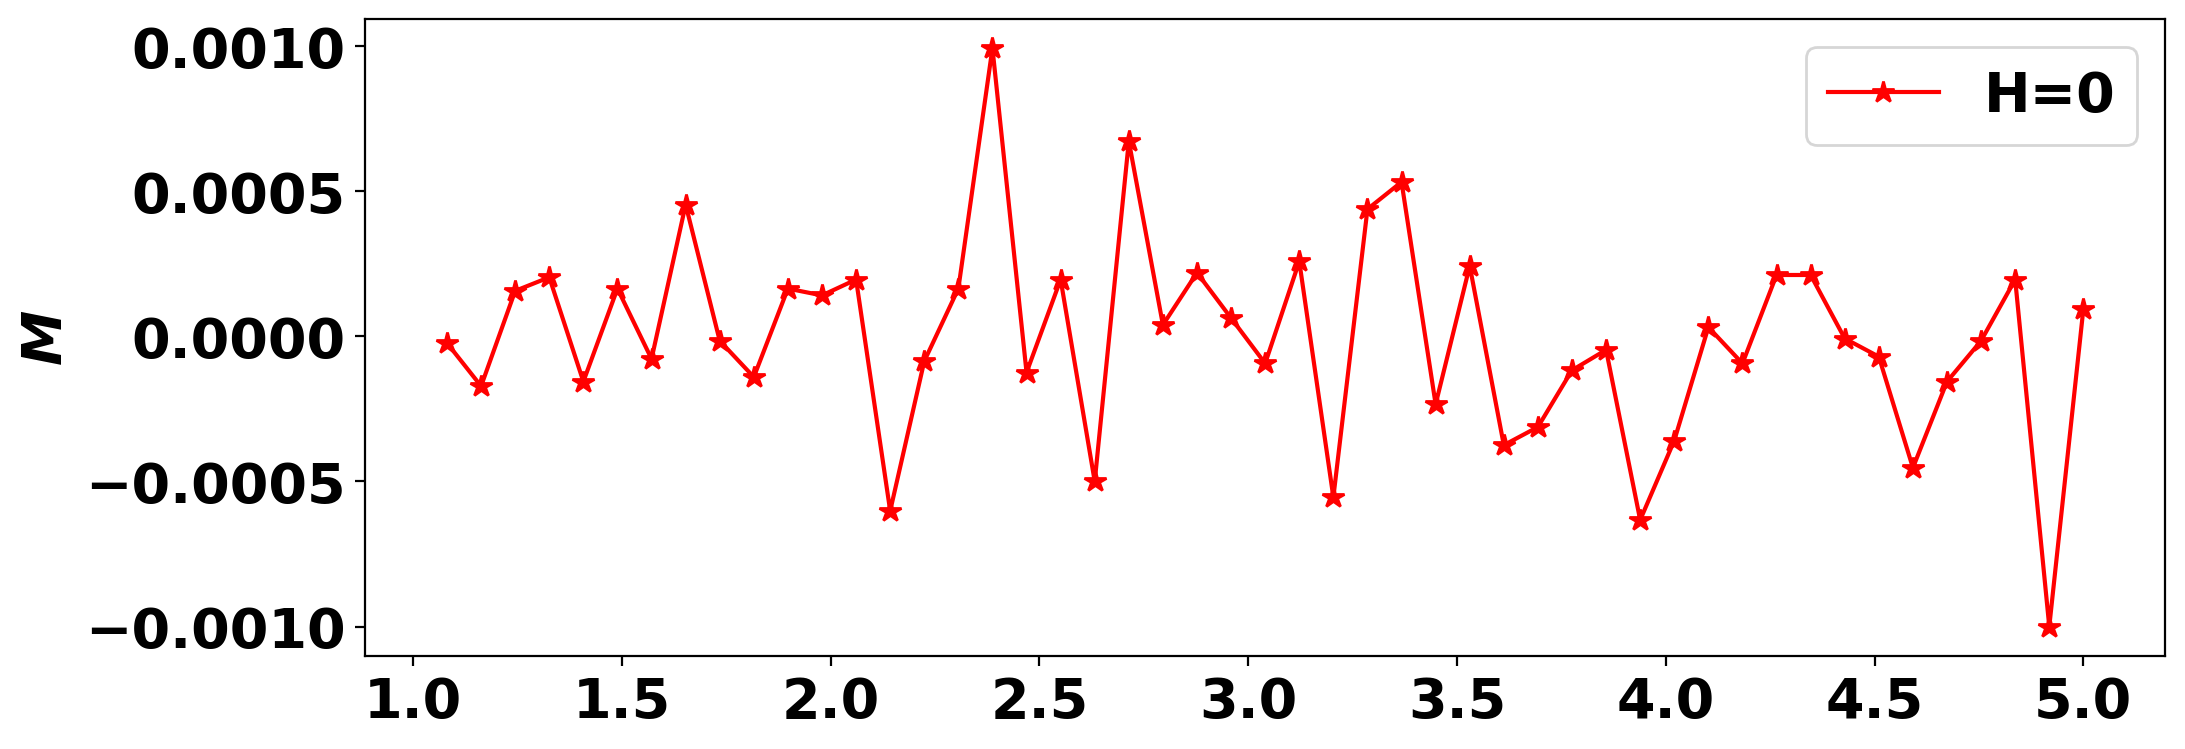

In [23]:
font = {'weight' : 'bold', 'size'   : 20}
matplotlib.rc('font', **font)

#mej_val, cov = curve_fit(ajuste_ising1, T, M)

fig1 = plt.figure(1,figsize=(10,14),dpi=200)

ax1 = plt.subplot(2,1,1)

#mej_val1, cov = curve_fit(ajuste_ferro, T, np.abs(mm1)*1/2) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    
plt.plot(T,mm1*1/2,ms=8,color='red',marker="*",label='H='+str(B))

    
#plt.plot(T,np.array(ajuste_ferro(T,mej_val1[0]))/2,ms=8,color='black',marker=">",label='Ajuste')

plt.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.6, 
                    wspace=0.1, 
                    hspace=0.2) 
    
#plt.plot(T,ajuste_ising1(T,mej_val[0]),ms=5,marker="^",label='Ajuste')
        


plt.ylabel('$M$')


#ax1 = plt.subplot(2,1,2)

#mej_val, cov = curve_fit(ajuste_capacidad, T, cc1) #Se ajusta la gaussiana, mej_val contiene dos parametros.
#plt.plot(T,cc1,ms=8,color='black',marker="*",label='H='+str(B))
#plt.plot(T,np.array(ajuste_capacidad(T,mej_val[0])),ms=8,color='red',marker=">",label='Ajuste')
#plt.xlabel('$T$')

#plt.ylabel('$C$')
    
#plt.legend()


fig1.savefig('AS_MC.png')    